# Evaluation Project 7: Loan Application Status Prediction

# Loan Application Status is a classification based problem statement to predict if the loan of applicant is approved or mot from the given details, it also strives to study and generate as many insights as as possible. The dataset includes details of applicants who have applied, example:
# Loan_ID,Gender,Married,Dependents,Education,Self_Employed, ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term, Credit_History,Property_Area,Loan_Status

# Importing Data From Github repository dsrscientist/DSData/blob/master/loan_prediction.csv

# Importing Required Libraries And Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv',parse_dates=True)
data

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [2]:
# Observation 1
shape_of_data=data.shape
print('Number Of Rows: ',shape_of_data[0], 'Number Of Columns: ', shape_of_data[1])

Number Of Rows:  614 Number Of Columns:  13


# Data Cleaning

In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
print('Type of storage of data ', type(data), '\nType of data series ', type(data.columns))

Type of storage of data  <class 'pandas.core.frame.DataFrame'> 
Type of data series  <class 'pandas.core.indexes.base.Index'>


In [5]:
data.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [6]:
data.isna().values.any()

True

In [7]:
data.isnull().values.sum()

149

In [8]:
data=data.fillna(method='ffill')
data=data.fillna(method='bfill')
data.isna().values.any(), data.isnull().values.sum()

(False, 0)

In [9]:
data.dtypes, len(data.dtypes)

(Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object,
 13)

# Tabulated Conclusion Of Data Cleaning

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Verbal Translation Of Conclusion Of Above Data Cleaning Process

# Conclusion:
1. The dataset has no missing values, therefore imputation and filling data are not required.
2. The whole dataset is of 614*13, hence, chances of underfitting, that is, model getting trained less than essential are high so we will go through the data thoroughly and try to draw anomalies and code some derived features, that can be of help in making predictions.
3. There are 5 continuous columns and 8 categorical columns, hence, encoding is not required.

# Dataset Visualization                                                                                                     

# Head View

In [11]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# The above table represents first five rows of original dataset

# Sample View

In [12]:
data.sample()

Loan_ID Gender Married Dependents     Education Self_Employed  \
18  LP001038   Male     Yes          0  Not Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
18             4887                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
18             1.0         Rural           N

# The above table represents a random row as sample row from the dataset

# Tail View

In [13]:
data.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

# The above table represents last five rows of the dataframe.

# EDA

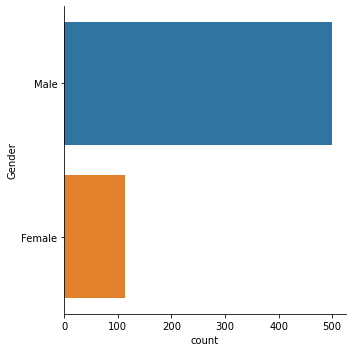

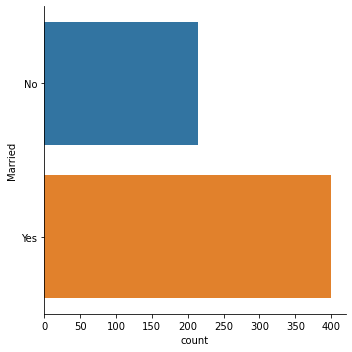

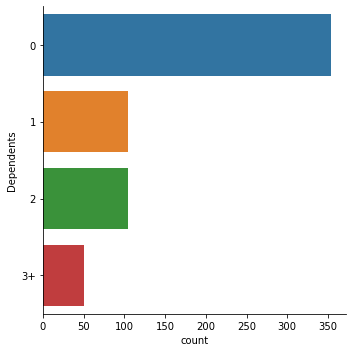

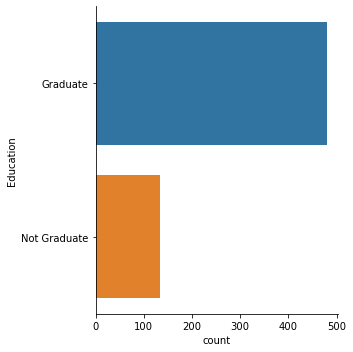

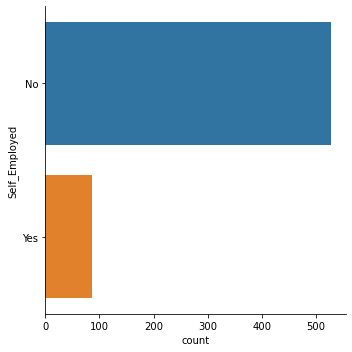

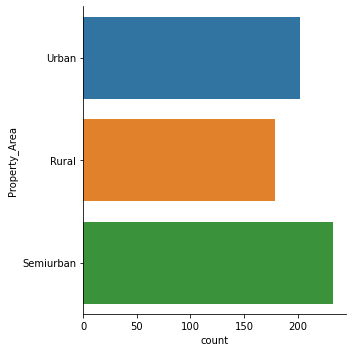

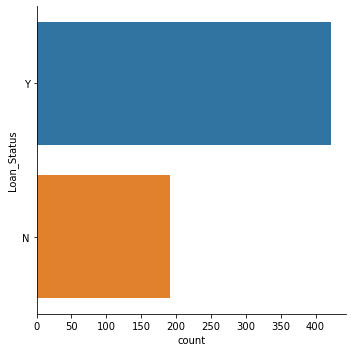

In [14]:
for x in data.select_dtypes(object).columns:
    if x=='Loan_ID':
        continue
    else:
        sns.catplot(y=x, kind='count', data=data)

In [15]:
import plotly.express as px
fig = px.bar(data, y = 'Loan_ID', )
fig.show()

# Tabulated Analysis Of Above Countplots

In [16]:
object_description=data.select_dtypes(object).describe()
object_description=object_description.rename(index={'count':'count of values', 'unique':'unique values', 'top':'most frequent value', 'freq':'frequency of most frequent value'})
dict1=object_description.iloc[0,:]-object_description.iloc[3,:]
object_description1=pd.concat([object_description, pd.DataFrame(dict1).T])
object_description1=object_description1.rename(index={0:'count of remaining values'})
object_description1

Loan_ID Gender Married Dependents  \
count of values                        614    614     614        614   
unique values                          614      2       2          4   
most frequent value               LP001002   Male     Yes          0   
frequency of most frequent value         1    500     400        354   
count of remaining values              613    114     214        260   

                                 Education Self_Employed Property_Area  \
count of values                        614           614           614   
unique values                            2             2             3   
most frequent value               Graduate            No     Semiurban   
frequency of most frequent value       480           528           233   
count of remaining values              134            86           381   

                                 Loan_Status  
count of values                          614  
unique values                              2  
most frequent value                        Y  
frequency of most frequent value         422  
count of remaining values                192

# Verbal Translation Of Above Table

# Unique Values Of All Columns With Object Values (Exclusing Loan Id, that has all unique values)

In [17]:
data['Gender'].unique(), data['Married'].unique(), data['Dependents'].unique(), data['Education'].unique(), data['Self_Employed'].unique(), data['Property_Area'].unique(), data['Loan_Status'].unique()

(array(['Male', 'Female'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Urban', 'Rural', 'Semiurban'], dtype=object),
 array(['Y', 'N'], dtype=object))

# 1. There are 8 object columns, of which 3 are spread across yes and no:
    i. Loan Status has 192 No Values and 422 Yes Values (422 loan applications can be approved).

    ii. 400 married and 214 unmarried people have applied for loan.

    iii. 500 male and 114 female applicants have applied for loan.

# Apart from these, remaining 5 columns have more than 2 unique values and are arranged in cell above:
    Rows 3, 4 and 5 explain the most frequent value and its count and data portion occupied by other unique values.

    For example, there are 614 unique loan id and each appears once.

# Tabulated Conclusion Of Data Cleaning

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Verbal Translation Of Conclusion Of Above Data Cleaning Process

# Conclusion:
### The dataset has no missing values, therefore imputation and filling data are not required.
### The whole dataset is of  614 rows*13 columns, hence, chances of underfitting, that is, model getting trained less than essential are high so we will go through the data thoroughly and try to draw anomalies and code some derived features, that can be of help in making predictions.
### There are 5 continuous columns and 8 categorical columns, hence, encoding is not required.

# Feature Engineering

# Encoding

In [19]:
data.select_dtypes(object).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Encoding Of All Other Object Columns With Ordinal Encoder (8 such columns)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data.select_dtypes(include = [object]))
encoded_data=pd.DataFrame(data=result, columns=data.select_dtypes(include = [object]).columns+'_'+'encoded')
encoded_data

Loan_ID_encoded  Gender_encoded  Married_encoded  Dependents_encoded  \
0                0.0             1.0              0.0                 0.0   
1                1.0             1.0              1.0                 1.0   
2                2.0             1.0              1.0                 0.0   
3                3.0             1.0              1.0                 0.0   
4                4.0             1.0              0.0                 0.0   
..               ...             ...              ...                 ...   
609            609.0             0.0              0.0                 0.0   
610            610.0             1.0              1.0                 3.0   
611            611.0             1.0              1.0                 1.0   
612            612.0             1.0              1.0                 2.0   
613            613.0             0.0              0.0                 0.0   

     Education_encoded  Self_Employed_encoded  Property_Area_encoded  \
0                  0.0                    0.0                    2.0   
1                  0.0                    0.0                    0.0   
2                  0.0                    1.0                    2.0   
3                  1.0                    0.0                    2.0   
4                  0.0                    0.0                    2.0   
..                 ...                    ...                    ...   
609                0.0                    0.0                    0.0   
610                0.0                    0.0                    0.0   
611                0.0                    0.0                    2.0   
612                0.0                    0.0                    2.0   
613                0.0                    1.0                    1.0   

     Loan_Status_encoded  
0                    1.0  
1                    0.0  
2                    1.0  
3                    1.0  
4                    1.0  
..                   ...  
609                  1.0  
610                  1.0  
611                  1.0  
612                  1.0  
613                  0.0  

[614 rows x 8 columns]

# Comparison Of Encoded Column And Original Column ('Loan Status')

In [21]:
encoded_data['Loan_Status_encoded'].unique()

array([1., 0.])

In [22]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# Conclusion
Y is encoded as 1 and 0 is encoded as N 

# Concatenating Encoded Data With Original Data

In [23]:
data=pd.concat([data, encoded_data], axis=1, ignore_index=False)
data=data.fillna(0)
data=data.drop(data.select_dtypes(object).columns, axis=1)
data.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
0             1.0              0.0             1.0              0.0   
1             1.0              1.0             1.0              1.0   
2             1.0              2.0             1.0              1.0   
3             1.0              3.0             1.0              1.0   
4             1.0              4.0             1.0              0.0   

   Dependents_encoded  Education_encoded  Self_Employed_encoded  \
0                 0.0                0.0                    0.0   
1                 1.0                0.0                    0.0   
2                 0.0                0.0                    1.0   
3                 0.0                1.0                    0.0   
4                 0.0                0.0                    0.0   

   Property_Area_encoded  Loan_Status_encoded  
0                    2.0                  1.0  
1                    0.0                  0.0  
2                    2.0                  1.0  
3                    2.0                  1.0  
4                    2.0                  1.0

# Saving a copy of dataframe as final_dataframe that will be used further and data will be kept as storage of encoded and raw data.

In [24]:
final_dataframe=data.copy()

In [25]:
final_dataframe.isna().values.any()

False

In [26]:
final_dataframe=final_dataframe.fillna(0)
final_dataframe.isna().values.any()

False

In [27]:
final_dataframe[np.isinf(final_dataframe)] = 0

# There are no null and missing values in final dataframe.

# EDA Part 1

In [28]:
final_dataframe[:10]

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
0             1.0              0.0             1.0              0.0   
1             1.0              1.0             1.0              1.0   
2             1.0              2.0             1.0              1.0   
3             1.0              3.0             1.0              1.0   
4             1.0              4.0             1.0              0.0   
5             1.0              5.0             1.0              1.0   
6             1.0              6.0             1.0              1.0   
7             0.0              7.0             1.0              1.0   
8             1.0              8.0             1.0              1.0   
9             1.0              9.0             1.0              1.0   

   Dependents_encoded  Education_encoded  Self_Employed_encoded  \
0                 0.0                0.0                    0.0   
1                 1.0                0.0                    0.0   
2                 0.0                0.0                    1.0   
3                 0.0                1.0                    0.0   
4                 0.0                0.0                    0.0   
5                 2.0                0.0                    1.0   
6                 0.0                1.0                    0.0   
7                 3.0                0.0                    0.0   
8                 2.0                0.0                    0.0   
9                 1.0                0.0                    0.0   

   Property_Area_encoded  Loan_Status_encoded  
0                    2.0                  1.0  
1                    0.0                  0.0  
2                    2.0                  1.0  
3                    2.0                  1.0  
4                    2.0                  1.0  
5                    2.0                  1.0  
6                    2.0                  1.0  
7                    1.0                  0.0  
8                    2.0                  1.0  
9                    1.0                  0.0

# The above table represents first 10 rows from final dataframe.

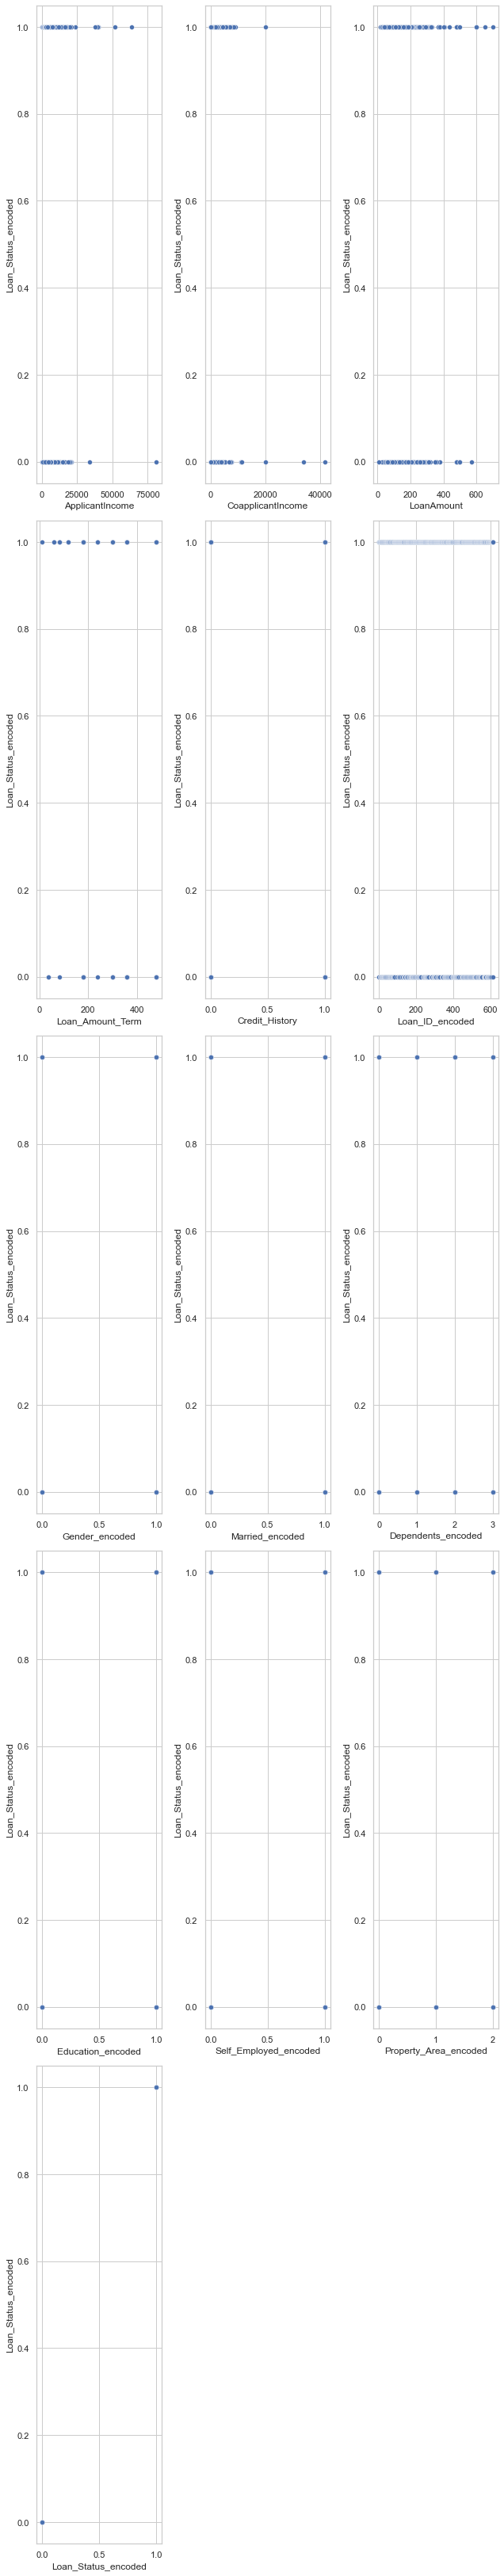

In [29]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.scatterplot(colist[x], y='Loan_Status_encoded', data=final_dataframe)
        plt.tight_layout()
    except ValueError:
        continue

# It can be visualized from above scatter plots against outcome vector that distribution is mostly evenly distributed for most of the columns. For example, 

### Loan Amount Term

### Credit History

### Gender Encoded

### Married Encoded

### Dependents Encoded

### Education Encoded

### Self Employed Encoded

### Property Area Encoded


# Anomalies Detected

## Loan Application Status: Y is encoded as 1 and 0 is encoded as N

### More approved loans are observed for higher income.

### More disapproved loans are observed for higher co applicant income.

### More approved loans are observed for higher loan amounts.

# Value Count Of employees vulnerable to attrition and not.

In [30]:
data['Loan_Status_encoded'].value_counts()

1.0    422
0.0    192
Name: Loan_Status_encoded, dtype: int64

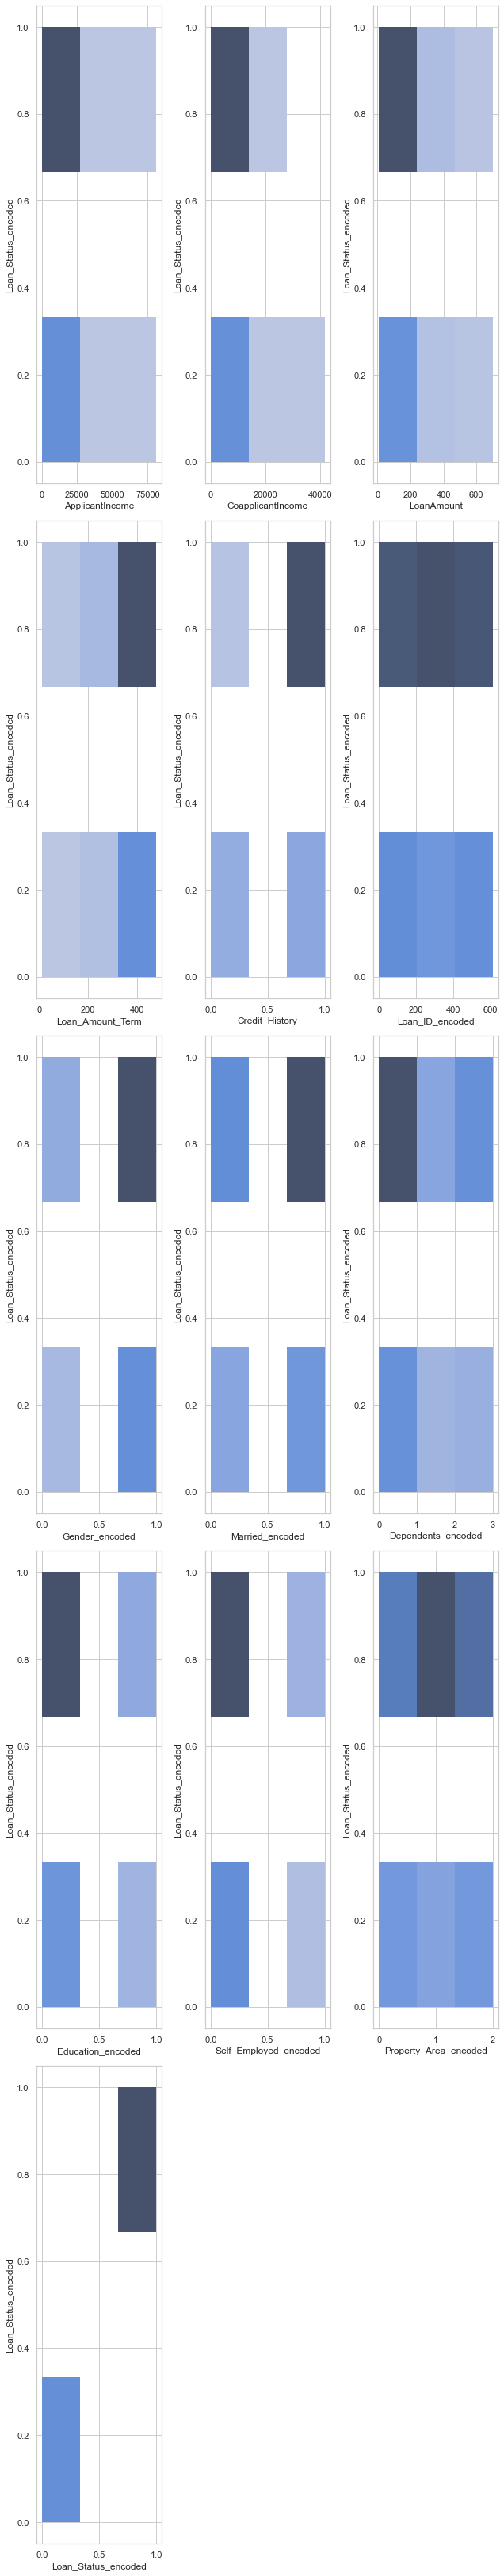

In [31]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.histplot(x=colist[x], y='Loan_Status_encoded', data=final_dataframe, bins=3)
        plt.tight_layout()
    except ValueError:
        continue

# The above histograms show frequency distribution of features against label. It is divided into 3 bins. Loan_Amount_Term, Credit_History,        Gender_encoded, Loan_Status_encoded, Married_encoded and Property_Area_encoded show left skewness. Right skewness is found in:  Dependents_encoded, Education_encoded, Self_Employed_encoded, LoanAmount , ApplicantIncome, CoapplicantIncome.
# Many datapoints, Married_encoded and Property_Area_encoded seem to be close to normal with skewness threshold within +/-0.65.
# 1 column has 0 skewness (as desired in normal distribution):
## Loan Id Encoded

# Correlation Analysis

In [33]:
final_dataframe.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome               1.000000          -0.116605    0.533336   
CoapplicantIncome            -0.116605           1.000000    0.189820   
LoanAmount                    0.533336           0.189820    1.000000   
Loan_Amount_Term             -0.042849          -0.067336    0.023657   
Credit_History               -0.020183           0.009391   -0.013205   
Loan_ID_encoded               0.016925           0.039211    0.042097   
Gender_encoded                0.046230           0.086991    0.100475   
Married_encoded               0.049052           0.077760    0.133471   
Dependents_encoded            0.115036           0.026683    0.141971   
Education_encoded            -0.140760          -0.062290   -0.151763   
Self_Employed_encoded         0.122728          -0.021807    0.099519   
Property_Area_encoded        -0.009500           0.010522   -0.038687   
Loan_Status_encoded          -0.004710          -0.059187   -0.044622   

                       Loan_Amount_Term  Credit_History  Loan_ID_encoded  \
ApplicantIncome               -0.042849       -0.020183         0.016925   
CoapplicantIncome             -0.067336        0.009391         0.039211   
LoanAmount                     0.023657       -0.013205         0.042097   
Loan_Amount_Term               1.000000       -0.031843        -0.024704   
Credit_History                -0.031843        1.000000        -0.014810   
Loan_ID_encoded               -0.024704       -0.014810         1.000000   
Gender_encoded                -0.080085       -0.008501        -0.030224   
Married_encoded               -0.099170        0.007358        -0.018474   
Dependents_encoded            -0.085453       -0.070299         0.061533   
Education_encoded             -0.080674       -0.084637         0.039442   
Self_Employed_encoded         -0.035485       -0.010803         0.036723   
Property_Area_encoded         -0.066556        0.021124        -0.155416   
Loan_Status_encoded           -0.033378        0.525152         0.011773   

                       Gender_encoded  Married_encoded  Dependents_encoded  \
ApplicantIncome              0.046230         0.049052            0.115036   
CoapplicantIncome            0.086991         0.077760            0.026683   
LoanAmount                   0.100475         0.133471            0.141971   
Loan_Amount_Term            -0.080085        -0.099170           -0.085453   
Credit_History              -0.008501         0.007358           -0.070299   
Loan_ID_encoded             -0.030224        -0.018474            0.061533   
Gender_encoded               1.000000         0.371532            0.164475   
Married_encoded              0.371532         1.000000            0.333841   
Dependents_encoded           0.164475         0.333841            1.000000   
Education_encoded            0.049480         0.014097            0.054909   
Self_Employed_encoded        0.011676        -0.000257            0.044505   
Property_Area_encoded       -0.019854         0.004415            0.005131   
Loan_Status_encoded          0.012213         0.089072           -0.003361   

                       Education_encoded  Self_Employed_encoded  \
ApplicantIncome                -0.140760               0.122728   
CoapplicantIncome              -0.062290              -0.021807   
LoanAmount                     -0.151763               0.099519   
Loan_Amount_Term               -0.080674              -0.035485   
Credit_History                 -0.084637              -0.010803   
Loan_ID_encoded                 0.039442               0.036723   
Gender_encoded                  0.049480               0.011676   
Married_encoded                 0.014097              -0.000257   
Dependents_encoded              0.054909               0.044505   
Education_encoded               1.000000              -0.008734   
Self_Employed_encoded          -0.008734               1.000000   
Property_Area_encoded          -0.0652

# The above table represents correlation among dataset. There seems some multicollinearity due to presence of married encoded and loan amount term; that show strong correlation between each other. Other  than these columns there seems modest collinearity among features. We will do further eda before arriving at a conclusion to delete these columns.

# Graphical Representation Of Correlation Of Features With Label

In [245]:
import cufflinks as cf
cf.set_config_file(offline=True)
pd.DataFrame((final_dataframe.corr()['Loan_Status_encoded'])).iplot(title='Correlation Of Variables With Label')

# The above iplot represents correlation of features with label. Correlation of features with labe is of high relevance. The stronger the relationship of label with axis, the more accurate the prediction. In the above line graph:

## 1. Highest correlation with label is observed to be 52.52%, that is shared with credit history. Minimum correlation is -0.34%, shared with Dependent encoded.

## 2. Weak Positive To Strong Positive Relationship Is Found With Following Features:

    Self_Employed_encoded    0.009035

    Loan_ID_encoded          0.011773

    Gender_encoded           0.012213

    Property_Area_encoded    0.032112

    Married_encoded          0.089072

    Credit_History           0.525152


## 3. Weak Negative Relationship Is Found With Following Features:

    Education_encoded       -0.085884

    CoapplicantIncome       -0.059187

    LoanAmount              -0.044622

    Loan_Amount_Term        -0.033378

    ApplicantIncome         -0.004710

    Dependents_encoded      -0.003361

## 4. Correlation Of Label with itself is of no relevance

# Mathematical Notation:
Correlation (X, Y) = (Covariance Of X and Covariance Of Y)/(Std Of X and Std Of Y)

# Correlation Heatmaps Of Entire Dataset

<AxesSubplot:>

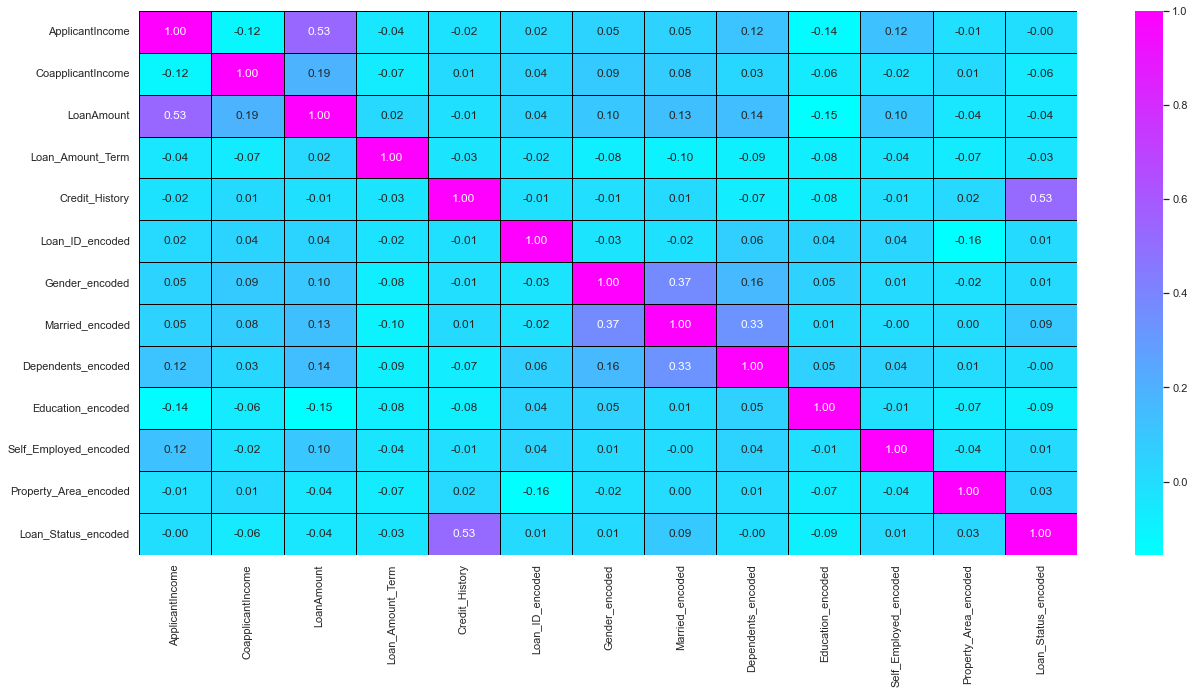

In [246]:
plt.figure(figsize=(21,10))
sns.heatmap(final_dataframe.corr().iloc[:,:27], annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='cool')

# Verbal Translation Of Above Graph:
## 1. Label has weak negative relationship with 3 features:

        Education_encoded

        CoapplicantIncome

        LoanAmount

        Loan_Amount_Term

        ApplicantIncome

        Dependents_encoded


## 2. Label has weak positive to strong positive relationship with these features in this heatmap:

        Self_Employed_encoded

        Loan_ID_encoded

        Gender_encoded

        Property_Area_encoded

        Married_encoded

        Credit_History


## 3. Strong Multicollinearity is detected among 5 features:

        Married Encoded

        Loan Amount Term

## 4. Multicollinearity seems to be moderate among all other data points.

## Q&A Answered

        1. Most useful feature is: Credit History.

        2. Features that can cause bias are: Married Encoded and Loan Amount Term.

        3. Explanatory Power of all variable: Moderate (due to weak to strong correlation with label).

# Data Handling Conclusion Of Correlation

# Overall correlation among dataset. There seems some multicollinearity due to presence of Married Encoded and Loan Amount Term; that show strong correlation between each other. Other than these columns there seems modest collinearity among features. We will do further eda befor arriving at a conclusion to delete these columns.

## The most useful feature is Credit History, apart from this, there seems modest correlation of features with label.

## As a conclusion, we will do further cause and effect analysis based on skewness and distribution plots to conclude if we want to remove multicollinarity pairs:

    i. Married Encoded and Loan Amount Term

# Dataset Information Table

In [247]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ApplicantIncome        614 non-null    int64  
 1   CoapplicantIncome      614 non-null    float64
 2   LoanAmount             614 non-null    float64
 3   Loan_Amount_Term       614 non-null    float64
 4   Credit_History         614 non-null    float64
 5   Loan_ID_encoded        614 non-null    float64
 6   Gender_encoded         614 non-null    float64
 7   Married_encoded        614 non-null    float64
 8   Dependents_encoded     614 non-null    float64
 9   Education_encoded      614 non-null    float64
 10  Self_Employed_encoded  614 non-null    float64
 11  Property_Area_encoded  614 non-null    float64
 12  Loan_Status_encoded    614 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 62.5 KB


# The above table reprents information dataset:
    
i. Columns

ii. Count Of Non Null Data Points

iii. Values data type for each columns

iv. Count of data types in iii.

v. Memory Usage

It can be deduced that the dataset has 614 rows and each columns has no missing values. The datatype used are float64 and int64. There 12 float64 columns, 1 int64 columns. Memory usage is 62.5 KB.

# Names of all the columns

In [248]:
data.select_dtypes(include = [np.number]).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_encoded',
       'Gender_encoded', 'Married_encoded', 'Dependents_encoded',
       'Education_encoded', 'Self_Employed_encoded', 'Property_Area_encoded',
       'Loan_Status_encoded'],
      dtype='object')

# The above code cell highlights all numeric columns, that will be used to derive following graphs.

# Box Plot To Detect Outliers

In [252]:
import plotly.express as px
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
for x in colist:
    try:
        fig = px.box(final_dataframe, x = x, y='Loan_Status_encoded')
        fig.show()
    except ValueError:
        print('{0} vales out of range, try skewness function to detect outliers'.format(x))
        continue

# Verbal Translation Of Above Graph
# 1. The data is free of outliers.
# 2. The data values have not even reached upper quartile for most of the plots, example, Capital Loss
# 3. For plots like, Native Country Encoded, it has extended only to maximum for some of the distinct values.

# Data Handling Conclusion For Outliers

# Box plot does not extend to even upper quartile for most of the cases, Hence we will study skewness to arrive at final conclusion about multicollinearity and outliers detected.

# Descriptive Statistics

In [253]:
description=final_dataframe.describe()
description

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  147.350163        341.628664   
std        6109.041673        2926.248369   87.444391         65.656819   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.000000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  167.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
count      614.000000       614.000000      614.000000       614.000000   
mean         0.835505       306.500000        0.814332         0.651466   
std          0.371027       177.390811        0.389155         0.476895   
min          0.000000         0.000000        0.000000         0.000000   
25%          1.000000       153.250000        1.000000         0.000000   
50%          1.000000       306.500000        1.000000         1.000000   
75%          1.000000       459.750000        1.000000         1.000000   
max          1.000000       613.000000        1.000000         1.000000   

       Dependents_encoded  Education_encoded  Self_Employed_encoded  \
count          614.000000         614.000000             614.000000   
mean             0.760586           0.218241               0.140065   
std              1.012005           0.413389               0.347338   
min              0.000000           0.000000               0.000000   
25%              0.000000           0.000000               0.000000   
50%              0.000000           0.000000               0.000000   
75%              2.000000           0.000000               0.000000   
max              3.000000           1.000000               1.000000   

       Property_Area_encoded  Loan_Status_encoded  
count             614.000000           614.000000  
mean                1.037459             0.687296  
std                 0.787482             0.463973  
min                 0.000000             0.000000  
25%                 0.000000             0.000000  
50%                 1.000000             1.000000  
75%                 2.000000             1.000000  
max                 2.000000             1.000000

In [254]:
lst=description.columns.to_list()
print(lst)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_ID_encoded', 'Gender_encoded', 'Married_encoded', 'Dependents_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Property_Area_encoded', 'Loan_Status_encoded']


In [255]:
lst1=[]
for x in range(len(lst)):
    lst1.append([description.iloc[6,x]-description.iloc[5,x]])
len(lst1), print(lst1)

[[1982.5], [1108.75], [39.75], [0.0], [0.0], [153.25], [0.0], [0.0], [2.0], [0.0], [0.0], [1.0], [0.0]]


(13, None)

In [256]:
lst1_frame=pd.DataFrame(data=lst1, index=lst, columns=['IQR'])
lst1_frame=lst1_frame.T
lst1_frame

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
IQR           1982.5            1108.75       39.75               0.0   

     Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
IQR             0.0           153.25             0.0              0.0   

     Dependents_encoded  Education_encoded  Self_Employed_encoded  \
IQR                 2.0                0.0                    0.0   

     Property_Area_encoded  Loan_Status_encoded  
IQR                    1.0                  0.0

In [257]:
lst3=[]
for x in range(len(lst)):
    lst3.append([description.iloc[7,x]-description.iloc[3,x]])
len(lst3), print(lst3)

[[80850.0], [41667.0], [691.0], [468.0], [1.0], [613.0], [1.0], [1.0], [3.0], [1.0], [1.0], [2.0], [1.0]]


(13, None)

In [258]:
lst3_frame=pd.DataFrame(data=lst3, index=lst, columns=['Range'])
lst3_frame=lst3_frame.T
lst3_frame

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Range          80850.0            41667.0       691.0             468.0   

       Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
Range             1.0            613.0             1.0              1.0   

       Dependents_encoded  Education_encoded  Self_Employed_encoded  \
Range                 3.0                1.0                    1.0   

       Property_Area_encoded  Loan_Status_encoded  
Range                    2.0                  1.0

In [259]:
lst5=pd.DataFrame(data=final_dataframe.skew().to_list(), index=lst, columns=['Skewness'])
lst5=lst5.T
lst6=pd.DataFrame(data=final_dataframe.kurtosis().to_list(), index=lst, columns=['Kurtosis'])
lst6=lst6.T
lst5, lst6

(          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 Skewness         6.539513           7.491531     2.61389         -2.293829   
 
           Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
 Skewness       -1.814433              0.0       -1.620738        -0.637293   
 
           Dependents_encoded  Education_encoded  Self_Employed_encoded  \
 Skewness            0.976422           1.367622               2.079309   
 
           Property_Area_encoded  Loan_Status_encoded  
 Skewness              -0.066196            -0.809998  ,
           ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 Kurtosis        60.540676          84.956384    9.615344          6.308089   
 
           Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
 Kurtosis        1.296378             -1.2         0.62883        -1.599077   
 
           Dependents_encoded  Education_encoded  Self_Employed_encoded  \
 Kurtosis           

# Outcome Table Of Descriptive Statistics

In [260]:
description1=pd.concat([description, lst1_frame, lst3_frame, lst5, lst6])
description1

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count          614.000000         614.000000  614.000000        614.000000   
mean          5403.459283        1621.245798  147.350163        341.628664   
std           6109.041673        2926.248369   87.444391         65.656819   
min            150.000000           0.000000    9.000000         12.000000   
25%           2877.500000           0.000000  100.000000        360.000000   
50%           3812.500000        1188.500000  128.000000        360.000000   
75%           5795.000000        2297.250000  167.750000        360.000000   
max          81000.000000       41667.000000  700.000000        480.000000   
IQR           1982.500000        1108.750000   39.750000          0.000000   
Range        80850.000000       41667.000000  691.000000        468.000000   
Skewness         6.539513           7.491531    2.613890         -2.293829   
Kurtosis        60.540676          84.956384    9.615344          6.308089   

          Credit_History  Loan_ID_encoded  Gender_encoded  Married_encoded  \
count         614.000000       614.000000      614.000000       614.000000   
mean            0.835505       306.500000        0.814332         0.651466   
std             0.371027       177.390811        0.389155         0.476895   
min             0.000000         0.000000        0.000000         0.000000   
25%             1.000000       153.250000        1.000000         0.000000   
50%             1.000000       306.500000        1.000000         1.000000   
75%             1.000000       459.750000        1.000000         1.000000   
max             1.000000       613.000000        1.000000         1.000000   
IQR             0.000000       153.250000        0.000000         0.000000   
Range           1.000000       613.000000        1.000000         1.000000   
Skewness       -1.814433         0.000000       -1.620738        -0.637293   
Kurtosis        1.296378        -1.200000        0.628830        -1.599077   

          Dependents_encoded  Education_encoded  Self_Employed_encoded  \
count             614.000000         614.000000             614.000000   
mean                0.760586           0.218241               0.140065   
std                 1.012005           0.413389               0.347338   
min                 0.000000           0.000000               0.000000   
25%                 0.000000           0.000000               0.000000   
50%                 0.000000           0.000000               0.000000   
75%                 2.000000           0.000000               0.000000   
max                 3.000000           1.000000               1.000000   
IQR                 2.000000           0.000000               0.000000   
Range               3.000000           1.000000               1.000000   
Skewness            0.976422           1.367622               2.079309   
Kurtosis           -0.424490          -0.130044               2.331110   

          Property_Area_encoded  Loan_Status_encoded  
count                614.000000           614.000000  
mean                   1.037459             0.687296  
std                    0.787482             0.463973  
min                    0.000000             0.000000  
25%                    0.000000             0.000000  
50%                    1.000000             1.000000  
75%                    2.000000             1.000000  
max                    2.000000             1.000000  
IQR                    1.000000             0.000000  
Range                  2.000000             1.000000  
Skewness              -0.066196            -0.809998  
Kurtosis              -1.383653            -1.348306

# Graphical Representation Of Above Table

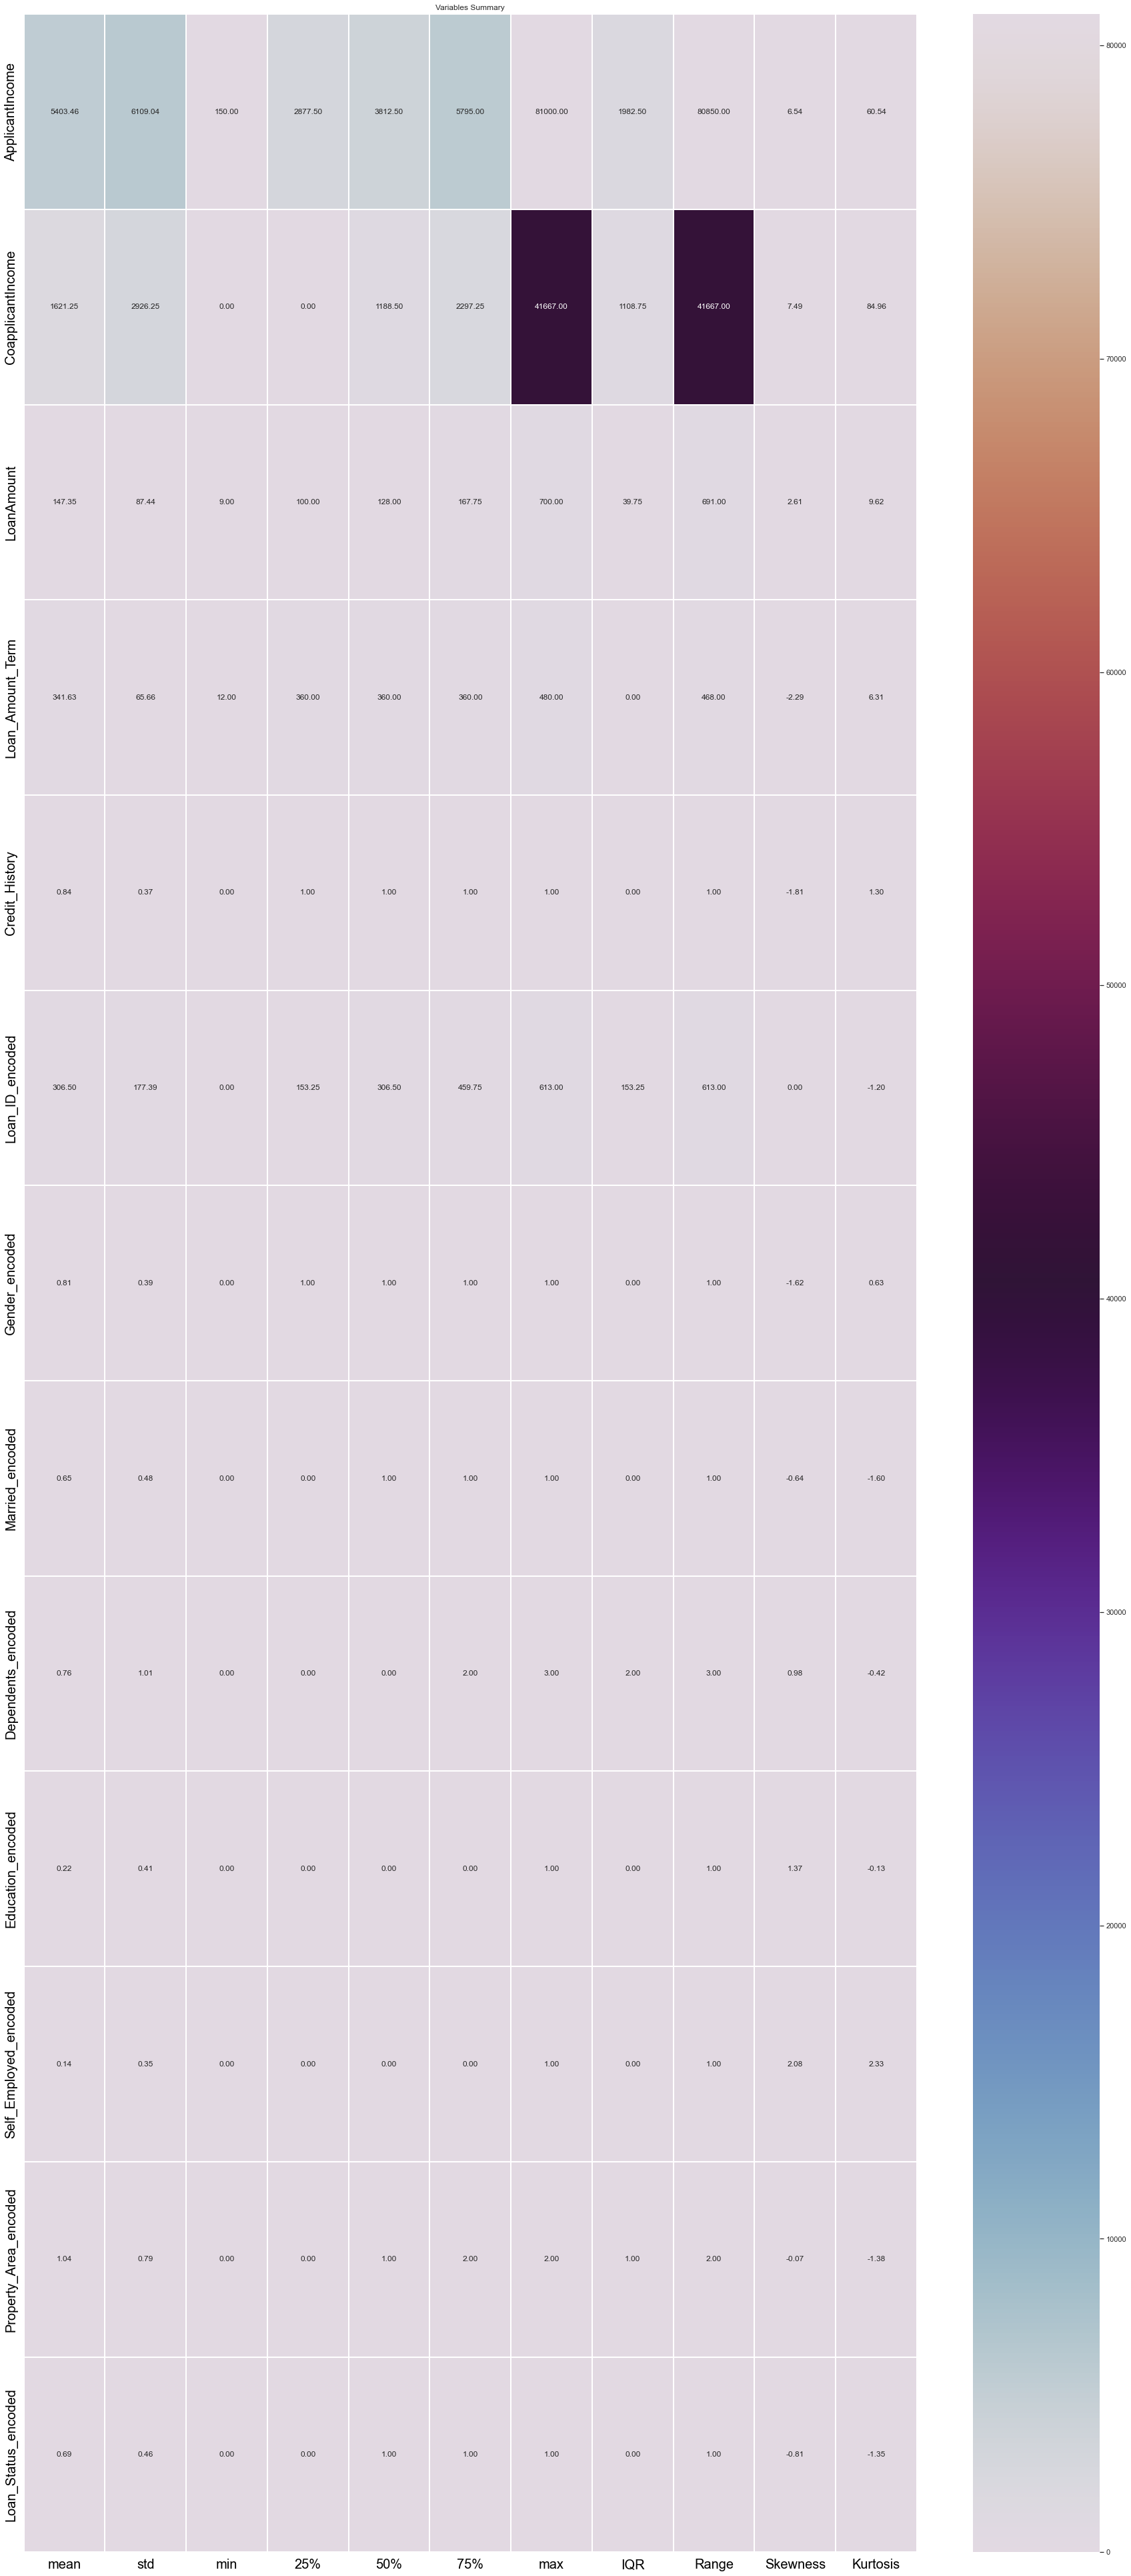

In [262]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,70))
sns.heatmap(round(description1[1:].transpose(),2), linewidth=2, annot=True, fmt='.2f', square=False, color='Black', cmap='twilight')
plt.xticks(fontsize=20, color='black')
plt.yticks(fontsize=20, color='black')
plt.title('Variables Summary')
plt.show()

# Mathematical Notation:
1. Mean = sum of values/count of values                                                                                     
2. std = sqrt(((value - mean of distribution)**2 / number of values ))                                                                                        
3. 3 quartile are measures of variance, calculated to spot the placeholder value, it returns index of the produced value.
Step 1: sort the dataset                                                                                                   
Step2:                                                                                                                     
i) Lower Quartile (Q1: 25% distribution) = ((number of values+1)/4)th Term                                                 
ii) Middle Quartile (Q2: 50% distribution) = ((number of values +1)/2)th Term                                               
Also, know as median (central value).                                                                                       
iii) Upper Quartile (Q3: 75% distribution) = ¾(number of values + 1)th Term                                                 
iv) IQR = Upper Quartile - Lowe Quartile                                                                                   
4. Range = Maximum Value - Minimum Value                                                                                   
5. Skewness = (sumation(value - mean of distribution)**3)/((number of values - 1) * std**3)                                 
6. Kurtosis = number of values * ((sumation(value - mean of distribution)**4) / std**4)

# Verbal Translation Of Descriptive Table And Graphic
## 1. For values that are scaled upto 1, mean is mostly around 0 and standard deviation is comparatively low. Hence, making the data much more acceptable by algorithms to process it more accurately.

## 2. The entire dataset ranges from 0 till 81000.0.

## 3. IQR, Range and Skewness and kurtosis are much more condensed in data that is scaled upto 1.

## 4. Skewness is 0 and within +/- 0.65 for:

        Married Encoded

        Property Area Encoded

        Loan ID Encoded

## 5. Acceptable skewness is +/- 0.65 and skewness for bell shaped curve should be 0.

## 6. Kutosis is upto 3 for most dataset, indicating platykurtic curves:

        Married_encoded

        Property_Area_encoded

        Loan_Status_encoded

        Loan_ID_encoded

        Dependents_encoded

        Education_encoded

        Gender_encoded

        Credit_History 

        Self_Employed_encoded 

## 7. Kurtosis is greater than 3, indicating, leptokurtic curve:

        Loan_Amount_Term

        LoanAmount

        ApplicantIncome 

        CoapplicantIncome

## 8. Kurtosis for bell shaped curve should be 3.

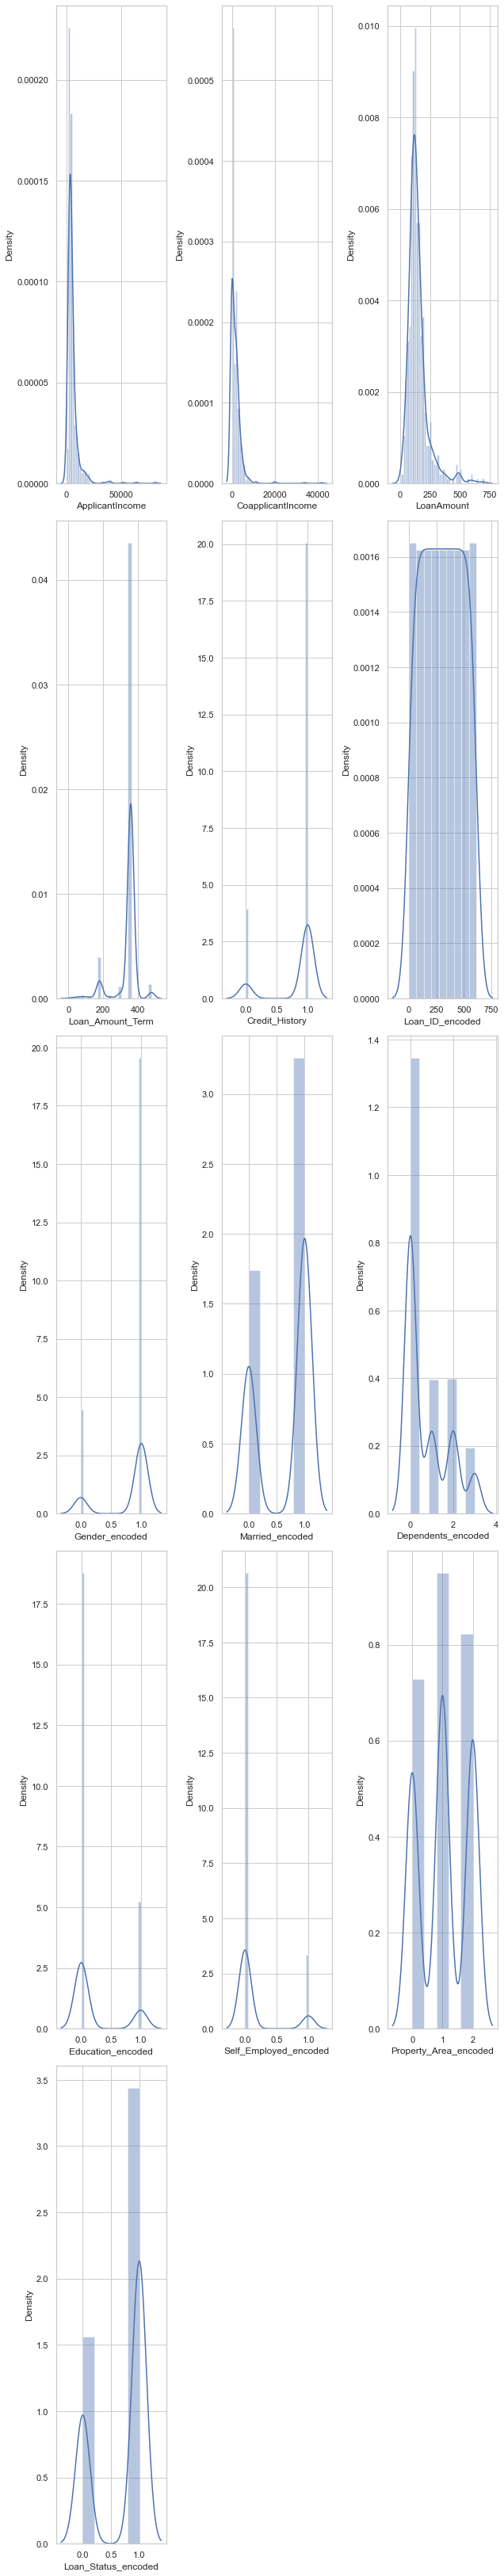

In [263]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.distplot(final_dataframe[colist[x]])
        plt.tight_layout()
    except ValueError:
        continue

# Observations
## 1. Acceptable skewness is +/-0.65 and Right skewness for bell shaped curve is 0

## 2. Acceptable and Outliers Prone Left skewness is observed in:

        Loan_Amount_Term        -2.293829

        Credit_History          -1.814433

        Gender_encoded          -1.620738

        Loan_Status_encoded     -0.809998

        Married_encoded         -0.637293

        Property_Area_encoded   -0.066196

## 3. Acceptable And Outliers Prone Right Skewness is observed in:

        Dependents_encoded       0.976422

        Education_encoded        1.367622

        Self_Employed_encoded    2.079309

        LoanAmount               2.613890

        ApplicantIncome          6.539513

        CoapplicantIncome        7.491531

## 4. Bell Shaped Curve (O skewness) is observed in:

        Loan_ID_encoded          0.000000

# Conclusion:
## Based On EDA done above in two parts, I will do ftest and pvalue test on these seeming strong and weak indicators:

    i. Coapplicant Income (Skewness And Kurtosis)

    ii. Married Encoded (Multicollinearity)

    iii. Loan Amount Term (Multicollinearity)


# ANOVA Test On Selected Features
## Ftest score should be greater than 1 and p value should be less than 0.05, to determine to keep these features for further analysis

# Feature 1: Coapplicant Income

In [45]:
from scipy.stats import f_oneway
f,p=f_oneway(final_dataframe['CoapplicantIncome'], final_dataframe['Loan_Status_encoded'])
f,p

(188.31088219098834, 5.673004531689039e-40)

# Feature 2: Married Encoded

In [46]:
from scipy.stats import f_oneway
f,p=f_oneway(final_dataframe['Married_encoded'], final_dataframe['Loan_Status_encoded'])
f,p

(1.7806078356059156, 0.1823224866036066)

# Feature 2: Loan Amount Term

In [47]:
from scipy.stats import f_oneway
f,p=f_oneway(final_dataframe['Loan_Amount_Term'], final_dataframe['Loan_Status_encoded'])
f,p

(16555.656681352128, 0.0)

# Error Removal And Data Handling

## Based on above analysis:
## 1. There are no outliers in the data.
## 2. Strong multicolliearity features are not important for prediction because there f test and p value are not acceptable. This mean that the amount of multicollineaity is significant and removing the feature will lower bias in the model.
# 3. Extereme leptokurtic and right skewed features are also relatively significant based on f test and p test.

# Hence, as a solution, feature scaling will do a better job in explaining the dependent variable than removing whole columns.

## The only feature that needs to be removed is Married Encoded.

In [48]:
final_dataframe=final_dataframe.drop('Married_encoded', axis=1)
final_dataframe

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_ID_encoded  Gender_encoded  Dependents_encoded  \
0               1.0              0.0             1.0                 0.0   
1               1.0              1.0             1.0                 1.0   
2               1.0              2.0             1.0                 0.0   
3               1.0              3.0             1.0                 0.0   
4               1.0              4.0             1.0                 0.0   
..              ...              ...             ...                 ...   
609             1.0            609.0             0.0                 0.0   
610             1.0            610.0             1.0                 3.0   
611             1.0            611.0             1.0                 1.0   
612             1.0            612.0             1.0                 2.0   
613             0.0            613.0             0.0                 0.0   

     Education_encoded  Self_Employed_encoded  Property_Area_encoded  \
0                  0.0                    0.0                    2.0   
1                  0.0                    0.0                    0.0   
2                  0.0                    1.0                    2.0   
3                  1.0                    0.0                    2.0   
4                  0.0                    0.0                    2.0   
..                 ...                    ...                    ...   
609                0.0                    0.0                    0.0   
610                0.0                    0.0                    0.0   
611                0.0                    0.0                    2.0   
612                0.0                    0.0                    2.0   
613                0.0                    1.0                    1.0   

     Loan_Status_encoded  
0                    1.0  
1                    0.0  
2                    1.0  
3                    1.0  
4                    1.0  
..                   ...  
609                  1.0  
610                  1.0  
611                  1.0  
612                  1.0  
613                  0.0  

[614 rows x 12 columns]

# The above table represents final dataframe that will go through machine learning  techniques of outliers treatment

# Z Score: Outliers Treatment

In [49]:
import numpy as np
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler
final_dataframe[np.isinf(final_dataframe)] = 0
scaled = StandardScaler()
final_dataframe=final_dataframe.fillna(method='ffill')
scaled.fit(final_dataframe)
scaled_data = scaled.transform(final_dataframe)
score=np.abs(stats.zscore(scaled_data))
score.shape

(614, 12)

In [50]:
#threshold=(-3,3)
threshold=3
print(np.where(score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       443, 487, 495, 497, 506, 523, 524, 546, 561, 575, 581, 585, 600,
       604, 605], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2],
      dtype=int64))


# The cell above displays outlier values.

In [51]:
len(np.where(score>3)[0])

41

# The cell above shows number of outliers.

In [52]:
data_new=final_dataframe[(score<3).all(axis=1)]
data_new

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_ID_encoded  Gender_encoded  Dependents_encoded  \
0               1.0              0.0             1.0                 0.0   
1               1.0              1.0             1.0                 1.0   
2               1.0              2.0             1.0                 0.0   
3               1.0              3.0             1.0                 0.0   
4               1.0              4.0             1.0                 0.0   
..              ...              ...             ...                 ...   
609             1.0            609.0             0.0                 0.0   
610             1.0            610.0             1.0                 3.0   
611             1.0            611.0             1.0                 1.0   
612             1.0            612.0             1.0                 2.0   
613             0.0            613.0             0.0                 0.0   

     Education_encoded  Self_Employed_encoded  Property_Area_encoded  \
0                  0.0                    0.0                    2.0   
1                  0.0                    0.0                    0.0   
2                  0.0                    1.0                    2.0   
3                  1.0                    0.0                    2.0   
4                  0.0                    0.0                    2.0   
..                 ...                    ...                    ...   
609                0.0                    0.0                    0.0   
610                0.0                    0.0                    0.0   
611                0.0                    0.0                    2.0   
612                0.0                    0.0                    2.0   
613                0.0                    1.0                    1.0   

     Loan_Status_encoded  
0                    1.0  
1                    0.0  
2                    1.0  
3                    1.0  
4                    1.0  
..                   ...  
609                  1.0  
610                  1.0  
611                  1.0  
612                  1.0  
613                  0.0  

[577 rows x 12 columns]

# The table above shows the final dataframe after removing outliers, 41 rows are removed and resultant dimension is 577 rows * 12 columns

# IQR Method Of Outliers Removal

# Since, most the rows are removed by z method, hence, I will try IQR Method of outliers removal and power transformation method of outliers transformation.

In [53]:
Q1= final_dataframe[final_dataframe.columns].quantile(0.25)
Q3 = final_dataframe[final_dataframe.columns].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# The above code calculates IQR as discussed in descriptive statistics section of eda. It Upper Limit and Lower Limit of distribution curve.

In [54]:
final_dataframe[(final_dataframe[final_dataframe.columns] < lower_limit) | (final_dataframe[final_dataframe.columns] > upper_limit)] # outliers

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0                NaN                NaN         NaN               NaN   
1                NaN                NaN         NaN               NaN   
2                NaN                NaN         NaN               NaN   
3                NaN                NaN         NaN               NaN   
4                NaN                NaN         NaN               NaN   
..               ...                ...         ...               ...   
609              NaN                NaN         NaN               NaN   
610              NaN                NaN         NaN             180.0   
611              NaN                NaN         NaN               NaN   
612              NaN                NaN         NaN               NaN   
613              NaN                NaN         NaN               NaN   

     Credit_History  Loan_ID_encoded  Gender_encoded  Dependents_encoded  \
0               NaN              NaN             NaN                 NaN   
1               NaN              NaN             NaN                 NaN   
2               NaN              NaN             NaN                 NaN   
3               NaN              NaN             NaN                 NaN   
4               NaN              NaN             NaN                 NaN   
..              ...              ...             ...                 ...   
609             NaN              NaN             0.0                 NaN   
610             NaN              NaN             NaN                 NaN   
611             NaN              NaN             NaN                 NaN   
612             NaN              NaN             NaN                 NaN   
613             0.0              NaN             0.0                 NaN   

     Education_encoded  Self_Employed_encoded  Property_Area_encoded  \
0                  NaN                    NaN                    NaN   
1                  NaN                    NaN                    NaN   
2                  NaN                    1.0                    NaN   
3                  1.0                    NaN                    NaN   
4                  NaN                    NaN                    NaN   
..                 ...                    ...                    ...   
609                NaN                    NaN                    NaN   
610                NaN                    NaN                    NaN   
611                NaN                    NaN                    NaN   
612                NaN                    NaN                    NaN   
613                NaN                    1.0                    NaN   

     Loan_Status_encoded  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
..                   ...  
609                  NaN  
610                  NaN  
611                  NaN  
612                  NaN  
613                  NaN  

[614 rows x 12 columns]

# The above table displays, outliers detected by IQR Method, it displays all values beyond upper and lower limit and places NaN on all the values that are significant and within upper and lower limits.

In [55]:
new_df = final_dataframe[(final_dataframe[final_dataframe.columns] > lower_limit) & (final_dataframe[final_dataframe.columns] < upper_limit)]

In [56]:
new_df=new_df.fillna(method='bfill')
new_df

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       128.0               NaN   
1             4583.0             1508.0       128.0               NaN   
2             3000.0                0.0        66.0               NaN   
3             2583.0             2358.0       120.0               NaN   
4             6000.0                0.0       141.0               NaN   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0               NaN   
610           4106.0                0.0        40.0               NaN   
611           8072.0              240.0       253.0               NaN   
612           7583.0                0.0       187.0               NaN   
613           4583.0                0.0       133.0               NaN   

     Credit_History  Loan_ID_encoded  Gender_encoded  Dependents_encoded  \
0               NaN              0.0             NaN                 0.0   
1               NaN              1.0             NaN                 1.0   
2               NaN              2.0             NaN                 0.0   
3               NaN              3.0             NaN                 0.0   
4               NaN              4.0             NaN                 0.0   
..              ...              ...             ...                 ...   
609             NaN            609.0             NaN                 0.0   
610             NaN            610.0             NaN                 3.0   
611             NaN            611.0             NaN                 1.0   
612             NaN            612.0             NaN                 2.0   
613             NaN            613.0             NaN                 0.0   

     Education_encoded  Self_Employed_encoded  Property_Area_encoded  \
0                  NaN                    NaN                    2.0   
1                  NaN                    NaN                    0.0   
2                  NaN                    NaN                    2.0   
3                  NaN                    NaN                    2.0   
4                  NaN                    NaN                    2.0   
..                 ...                    ...                    ...   
609                NaN                    NaN                    0.0   
610                NaN                    NaN                    0.0   
611                NaN                    NaN                    2.0   
612                NaN                    NaN                    2.0   
613                NaN                    NaN                    1.0   

     Loan_Status_encoded  
0                    1.0  
1                    0.0  
2                    1.0  
3                    1.0  
4                    1.0  
..                   ...  
609                  1.0  
610                  1.0  
611                  1.0  
612                  1.0  
613                  0.0  

[614 rows x 12 columns]

# The above table displays the final dataframe after IQR  treatment, since this method restores most the rows. It signifies that outliers are not very much spread and can be treated with power transform method after removing significant outliers rows.

# I prefer Z Score+ Power Transform in this case because IQR has a lot of missing values and improper data, whole columns that have significant f value and p value are missing. Hence, I would remove some data points from theses columns using z score and then transform the entire dataset to make free from outliers and retain feature explanatory power.

# Vectorization

# I have divided the datset into X and Y vectors by removing label and its transformation from features vector.

Label vector is LoanStatusEncoded.

In [58]:
final_dataframe=data_new.copy()
x=final_dataframe.drop(['Loan_Status_encoded'], axis=1)
y=final_dataframe['Loan_Status_encoded']
x.sample()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
569             3166             2064.0       104.0             360.0   

     Credit_History  Loan_ID_encoded  Gender_encoded  Dependents_encoded  \
569             0.0            569.0             1.0                 0.0   

     Education_encoded  Self_Employed_encoded  Property_Area_encoded  
569                0.0                    0.0                    2.0

# The above table displays a sample of features vector.

In [59]:
y.sample()

512    1.0
Name: Loan_Status_encoded, dtype: float64

# The above series displays a sample of label series.

# Outliers Transformation With Power Transform

In [60]:
from sklearn.preprocessing import power_transform
x_array=power_transform(x, method='yeo-johnson')
x_frame=pd.DataFrame(x_array, columns=x.columns)
x_frame

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.666679          -1.115002   -0.001041          0.134429   
1           0.224849           0.753466   -0.001041          0.134429   
2          -0.530170          -1.115002   -1.388663          0.134429   
3          -0.793075           0.902669   -0.148171          0.134429   
4           0.713157          -1.115002    0.224628          0.134429   
..               ...                ...         ...               ...   
572        -0.589895          -1.115002   -1.248390          0.134429   
573         0.027501          -1.115002   -2.273791         -2.509121   
574         1.258391           0.188883    1.729344          0.134429   
575         1.142865          -1.115002    0.920134          0.134429   
576         0.224849          -1.115002    0.087611          0.134429   

     Credit_History  Loan_ID_encoded  Gender_encoded  Dependents_encoded  \
0          0.449537        -2.157985        0.479872           -0.828236   
1          0.449537        -2.132414        0.479872            0.853451   
2          0.449537        -2.110511        0.479872           -0.828236   
3          0.449537        -2.090695        0.479872           -0.828236   
4          0.449537        -2.072298        0.479872           -0.828236   
..              ...              ...             ...                 ...   
572        0.449537         1.554397       -2.083889           -0.828236   
573        0.449537         1.558740        0.479872            1.524700   
574        0.449537         1.563082        0.479872            0.853451   
575        0.449537         1.567421        0.479872            1.317791   
576       -2.224512         1.571759       -2.083889           -0.828236   

     Education_encoded  Self_Employed_encoded  Property_Area_encoded  
0            -0.539284              -0.395364               1.197418  
1            -0.539284              -0.395364              -1.336729  
2            -0.539284               2.529315               1.197418  
3             1.854309              -0.395364               1.197418  
4            -0.539284              -0.395364               1.197418  
..                 ...                    ...                    ...  
572          -0.539284              -0.395364              -1.336729  
573          -0.539284              -0.395364              -1.336729  
574          -0.539284              -0.395364               1.197418  
575          -0.539284              -0.395364               1.197418  
576          -0.539284               2.529315               0.022132  

[577 rows x 11 columns]

# The above table displays outliers transformed values as discussed above.

In [61]:
x_frame[np.isinf(x_frame)] = 0
x_frame[np.isnan(x_frame)]=0

# In the above cell, I have filled infinite and na values with 0, in case those arose during the process of transformation.

In [62]:
y.unique()

array([1., 0.])

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler([0,1])
scaled.fit(x_frame)
scaled_data = scaled.transform(x_frame)
scaled_data

array([[0.71991726, 0.        , 0.57430363, ..., 0.        , 0.        ,
        1.        ],
       [0.66777536, 0.74920207, 0.57430363, ..., 0.        , 0.        ,
        0.        ],
       [0.57867286, 0.        , 0.38595741, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.78974735, 0.52282056, 0.80917397, ..., 0.        , 0.        ,
        1.        ],
       [0.77611367, 0.        , 0.69933744, ..., 0.        , 0.        ,
        1.        ],
       [0.66777536, 0.        , 0.58633655, ..., 0.        , 1.        ,
        0.53622034]])

# In the above cell, I have done positive scaling of features to make positive prediction. I have taken range of 0 to1 because that can be fitted as a good match with intercept to make concerned numeric prediction. Also, these values are more alike the label vector, hence, model performance can be sound.

In [64]:
x_frame1=pd.DataFrame(scaled_data, columns=x_frame.columns)

In [65]:
x_frame1.values.max()

1.0

# Converted array into dataframe with labelled columns and checked maximum value to ensure that no inf values are remaining.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled_data, w) for w in range(scaled_data.shape[1])]
vif['Features']=x_frame1.columns
vif=vif.sort_values(ascending=False, by='vif')
vif

vif               Features
0   32.847314        ApplicantIncome
2   27.874720             LoanAmount
3    6.408231       Loan_Amount_Term
6    5.961486         Gender_encoded
4    5.606317         Credit_History
5    5.420724        Loan_ID_encoded
1    2.952303      CoapplicantIncome
10   2.730947  Property_Area_encoded
7    1.815452     Dependents_encoded
8    1.294161      Education_encoded
9    1.217370  Self_Employed_encoded

In [67]:
drop_features=vif[vif['vif']>6]
drop_features

vif          Features
0  32.847314   ApplicantIncome
2  27.874720        LoanAmount
3   6.408231  Loan_Amount_Term

In [69]:
#features_lst=drop_features['Features'].values
x_frame11=x_frame1.drop(['ApplicantIncome', 'LoanAmount'], axis=1)
X_scaled=np.array(x_frame11)
#x=x.drop(features_lst, axis=1)
new_vif=pd.DataFrame()
new_vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
new_vif['Features']=x_frame11.columns
new_vif=new_vif.sort_values(ascending=False, by='vif')
new_vif

vif               Features
1  5.262250       Loan_Amount_Term
4  5.046635         Gender_encoded
2  4.804970         Credit_History
3  4.595838        Loan_ID_encoded
8  2.536127  Property_Area_encoded
0  2.347266      CoapplicantIncome
5  1.780734     Dependents_encoded
6  1.292399      Education_encoded
7  1.165023  Self_Employed_encoded

# Since, all the vif scores are below 6, I can pass the listed features for feature selection.

# Data Handling Conclusion

# Concluding Points:
1. As part of data handling, I have removed features with high outliers (by analyzing box plots, dist plots, variable plot and scatter plots).                            

2. I have removed multicollinearity by analyzing correlation, correlation heatmaps and variance inflation factor.                                                                  
3. Hence, the model can be expected to be low bias model.

# Feature Selection

In [70]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

In [71]:
x.shape, y.shape

((577, 11), (577,))

In [72]:
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x_frame11,y,test_size=0.30, random_state=100)

# In the above cell, I have checked final shape of each vector and splitted the dat ainto 30% test and 70% train with randomness value as 100.

In [73]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)

# In the above code, I have put the values in Variance Threshold Filter and transformed those. To ensure low variance, I have taken variance threshold of 0.01.

<AxesSubplot:>

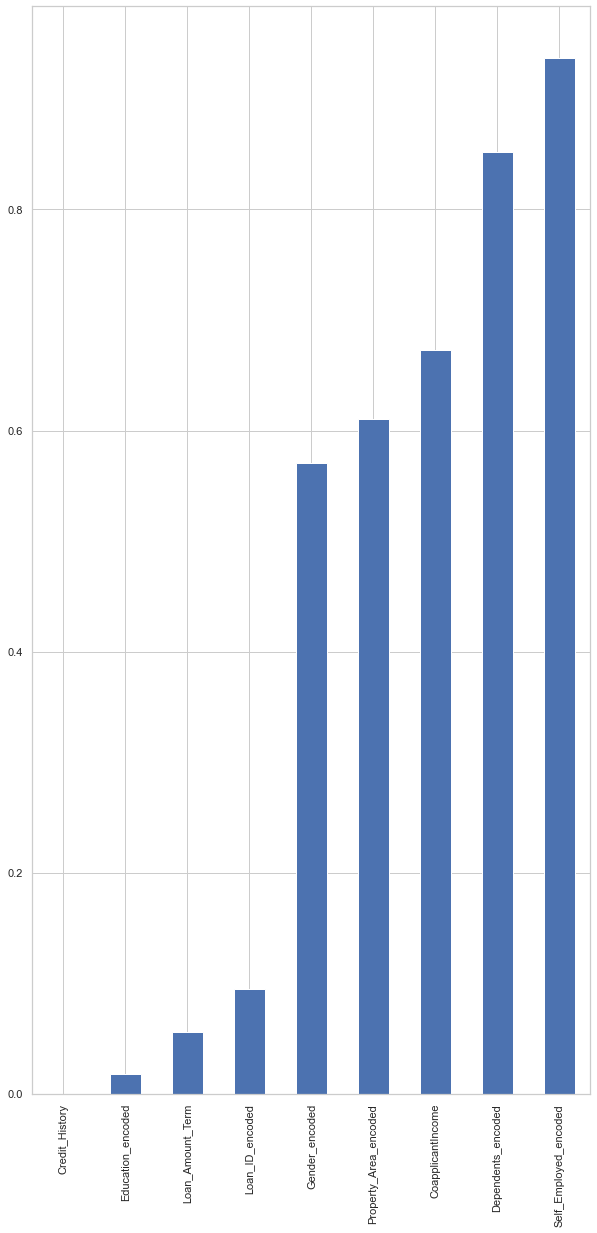

In [74]:
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))

# I have used these transformed values to generate pvalue of each feature (to explain label).

# Mathematical Notation

P Value = (sample proportion - Assumed population proportion in the null hypothesis)/(sqrt((Assumed population proportion in the null hypothesis * ( 1 - Assumed population proportion in the null hypothesis )) / n))

In [75]:
p_values=p_values[p_values<0.05]
p_values.index

Index(['Credit_History', 'Education_encoded'], dtype='object')

# These features strongly impact attrition and control actions are required mainly on these to curb the problems around attrition.

# P Values are an important component of feature selection, with significance level set to 0.05, Variance Threshold
    ensemble technique returns with 95% confidence, all the features that have maximum explanatory capacity
For the present dataset features with pvalues with less than 0.05 are:
Index(['Credit_History', 'Education_encoded'], dtype='object')

In [77]:
import numpy as np
x=x_frame1.copy()
x=x[['Credit_History', 'Education_encoded']]
x.sample()

Credit_History  Education_encoded
405             1.0                0.0

# The above table displays a sample of final x vector with features and values finally selected to be used for prediction.

In [78]:
y.sample()

253    1.0
Name: Loan_Status_encoded, dtype: float64

# The above series displays a sample of label.

In [79]:
x.shape, y.shape

((577, 2), (577,))

# The above cell displays final shapes of x and y vectors

In [80]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.6)

In [81]:
x_train.shape, y_train.shape

((230, 2), (230,))

# In the above two cells, I have divided final vectors with train test split technique, in which train data is 40% and test data is 60% to avoid overfitting issue.

# Model Development, Evaluation And Saving (Total Models = 10)

# Selection Reasoning Of Models 1 to 5

# The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, etcetera

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting,etcetera

# The use case assigned revolves around uneven label points hence there is high probality of not achieving a good fit. Hence, I have tried different ensembele techniques that can lower variance and bias and help achieve a goodness of fit. (Just as a reminder, I have already applied variance threshold of 0.01 to ensure that risk of models is low). 

# The theories in the two cells above explain why I have chosen Model 1, Model 2, Model 3, Model 4 and Model 5 for this use case. Model 5 is support vector classifier and hence, is again a very powerful implementation to prevent illness of fit and make appropriate decision boundaries.

# Model 1

# Random Forest Classifier With Intuitional Hyper Parameter Tuning

In [82]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import pickle
rfc=el(200, criterion='entropy', random_state=100, max_features='sqrt', min_weight_fraction_leaf=0.1, min_impurity_decrease=0.01, n_jobs=-1, warm_start=True, max_depth=30, max_leaf_nodes=10, ccp_alpha=1, oob_score=True, bootstrap=True)
rfc.fit(x_train, y_train)
model1_train_score=rfc.score(x_train, y_train)
model1_test_score=rfc.score(x_test, y_test)
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
cv_risk=scores.std()
y_pred=rfc.predict(x_train)
ytst_pred=rfc.predict(x_test)
model1_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred})
model1_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred})

In [83]:
model1_prediction_train

y_train  yhat
51       1.0   1.0
69       0.0   1.0
261      1.0   1.0
11       1.0   1.0
382      1.0   1.0
..       ...   ...
199      0.0   1.0
411      1.0   1.0
574      0.0   1.0
223      1.0   1.0
389      1.0   1.0

[230 rows x 2 columns]

In [84]:
model1_prediction_test

y_test  yhat
118     0.0   1.0
467     1.0   1.0
87      1.0   1.0
43      1.0   1.0
244     1.0   1.0
..      ...   ...
553     0.0   1.0
464     0.0   1.0
139     0.0   1.0
430     1.0   1.0
558     1.0   1.0

[347 rows x 2 columns]

In [85]:
# Model 1 Metrics

In [86]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test,ytst_pred),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))
#Since risk is low model is low variance and since train score and test score are equivalent, model is low bias too.

Train Score:  0.73
Test Score:  0.67
Train Accuracy Score:  0.73
Test Accuracy Score:  0.67
Cross Validation Score:  0.69
Cross Validation Risk:  0.0


In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,ytst_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       114
         1.0       0.67      1.00      0.80       233

    accuracy                           0.67       347
   macro avg       0.34      0.50      0.40       347
weighted avg       0.45      0.67      0.54       347



In [88]:
print(confusion_matrix(y_test,ytst_pred))

[[  0 114]
 [  0 233]]


In [89]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred), 2)
    print(auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

0.5


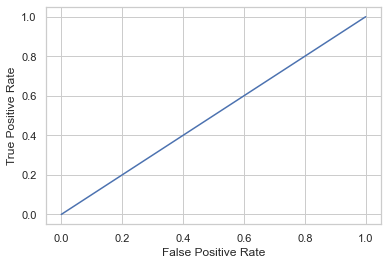

In [90]:
from sklearn import metrics
y_pred_proba =rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Model 2

# Random Forest Classifier With Default Hyper Parameter Tuning

In [91]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
rfc1=el()
rfc1.fit(x_train, y_train)
model2_train_score=rfc1.score(x_train, y_train)
model2_test_score=rfc1.score(x_test, y_test)
scores1=cross_val_score(rfc1, x, y, cv=5)
cv_scores1=scores1.mean()
cv_risk1=scores1.std()
y_pred1=rfc1.predict(x_train)
ytst_pred1=rfc1.predict(x_test)
model2_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred1})
model2_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred1})

In [92]:
model2_prediction_train

y_train  yhat
51       1.0   1.0
69       0.0   0.0
261      1.0   1.0
11       1.0   1.0
382      1.0   1.0
..       ...   ...
199      0.0   1.0
411      1.0   1.0
574      0.0   1.0
223      1.0   1.0
389      1.0   1.0

[230 rows x 2 columns]

In [93]:
model2_prediction_test

y_test  yhat
118     0.0   1.0
467     1.0   1.0
87      1.0   1.0
43      1.0   1.0
244     1.0   1.0
..      ...   ...
553     0.0   0.0
464     0.0   0.0
139     0.0   1.0
430     1.0   1.0
558     1.0   1.0

[347 rows x 2 columns]

In [94]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc1.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred1),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred1),2))
print('Cross Validation Score: ', np.round(cv_scores1,2))
print('Cross Validation Risk: ', np.round(cv_risk1,2))

Train Score:  0.84
Test Score:  0.81
Train Accuracy Score:  0.84
Test Accuracy Score:  0.81
Cross Validation Score:  0.82
Cross Validation Risk:  0.03


In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred1))

              precision    recall  f1-score   support

         0.0       0.87      0.48      0.62       114
         1.0       0.79      0.97      0.87       233

    accuracy                           0.81       347
   macro avg       0.83      0.72      0.75       347
weighted avg       0.82      0.81      0.79       347



In [96]:
print(confusion_matrix(y_test, ytst_pred1))

[[ 55  59]
 [  8 225]]


In [97]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred1), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.72


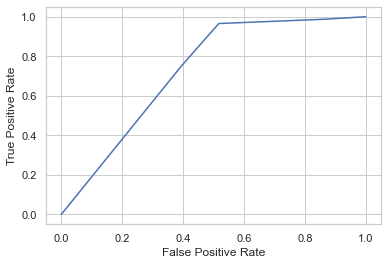

In [98]:
from sklearn import metrics
y_pred_proba =rfc1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [182]:
best_model=pickle.dumps(rfc1) #saving the best model

# Model 3

# RFC With Grid Search CV

In [99]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'max_features':['auto', 'sqrt', 'log2'],
 'criterion' : ['entropy', 'gini'],
 'bootstrap': [True, False],
 'oob_score':[True, False],
 'n_jobs':[None,-1],
 'warm_start':[True, False]
}
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
ytst_pred2=best_estim.predict(x_test)
model3_save=pickle.dumps(best_estim)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2})
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2})

In [100]:
# Model 3 Predictions

In [101]:
model3_prediction_train

y_train  yhat
51       1.0   1.0
69       0.0   0.0
261      1.0   1.0
11       1.0   1.0
382      1.0   1.0
..       ...   ...
199      0.0   1.0
411      1.0   1.0
574      0.0   1.0
223      1.0   1.0
389      1.0   1.0

[230 rows x 2 columns]

In [102]:
model3_prediction_test

y_test  yhat
118     0.0   1.0
467     1.0   1.0
87      1.0   1.0
43      1.0   1.0
244     1.0   1.0
..      ...   ...
553     0.0   0.0
464     0.0   0.0
139     0.0   1.0
430     1.0   1.0
558     1.0   1.0

[347 rows x 2 columns]

In [103]:
# Model 3 Metrics

In [104]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred2),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred2),2))

Train Score:  0.84
Test Score:  0.81
Train Accuracy Score:  0.84
Test Accuracy Score:  0.81


In [105]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50, 'n_jobs': None, 'oob_score': True, 'warm_start': True}
0.8391304347826086


In [106]:
best_estim=gridsearch.best_estimator_
print(best_estim)

RandomForestClassifier(criterion='entropy', n_estimators=50, oob_score=True,
                       warm_start=True)


In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred2))

print(confusion_matrix(y_test, ytst_pred2))

              precision    recall  f1-score   support

         0.0       0.87      0.48      0.62       114
         1.0       0.79      0.97      0.87       233

    accuracy                           0.81       347
   macro avg       0.83      0.72      0.75       347
weighted avg       0.82      0.81      0.79       347

[[ 55  59]
 [  8 225]]


In [108]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred2), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.72


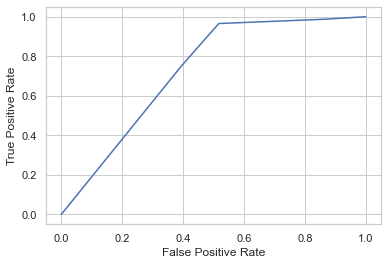

In [109]:
from sklearn import metrics
y_pred_proba =best_estim.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [183]:
best_model1=pickle.dumps(best_estim) #saving the best model

# Model 4

# Bagging Classifier With Grid Search CV Hyper Parameter Tuning

In [110]:
import sklearn
abreg1 = sklearn.ensemble.BaggingClassifier()
params = {
 'n_estimators': [50, 100],
 'bootstrap': [True, False],
 'random_state': [0,10,100,1000,10000,100000,100000],
 'oob_score': [True, False]
 }
gridsearch1=GridSearchCV(abreg1, params, cv=5, return_train_score=True)
gridsearch1.fit(x_train, y_train)
best_parameters1=gridsearch1.best_params_
best_score1=gridsearch1.best_score_
best_estim1=gridsearch1.best_estimator_
best_estim1.fit(x_train,y_train)
y_pred3=best_estim1.predict(x_train)
model4_train_score=best_estim1.score(x_train, y_train)
model4_test_score=best_estim1.score(x_test, y_test)
ytst_pred3=best_estim1.predict(x_test)
model4_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred3})
model4_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred3})

In [111]:
# Model 4 Predictions

In [112]:
model4_prediction_train

y_train  yhat
51       1.0   1.0
69       0.0   0.0
261      1.0   1.0
11       1.0   1.0
382      1.0   1.0
..       ...   ...
199      0.0   1.0
411      1.0   1.0
574      0.0   1.0
223      1.0   1.0
389      1.0   1.0

[230 rows x 2 columns]

In [113]:
model4_prediction_test

y_test  yhat
118     0.0   1.0
467     1.0   1.0
87      1.0   1.0
43      1.0   1.0
244     1.0   1.0
..      ...   ...
553     0.0   0.0
464     0.0   0.0
139     0.0   1.0
430     1.0   1.0
558     1.0   1.0

[347 rows x 2 columns]

In [114]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim1.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred3),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred3),2))

Train Score:  0.84
Test Score:  0.81
Train Accuracy Score:  0.84
Test Accuracy Score:  0.81


In [115]:
print(gridsearch1.best_params_)
print(gridsearch1.best_score_)

{'bootstrap': True, 'n_estimators': 50, 'oob_score': True, 'random_state': 0}
0.8391304347826086


In [116]:
best_estim=gridsearch1.best_estimator_
print(best_estim)

BaggingClassifier(n_estimators=50, oob_score=True, random_state=0)


In [117]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred3))

              precision    recall  f1-score   support

         0.0       0.87      0.48      0.62       114
         1.0       0.79      0.97      0.87       233

    accuracy                           0.81       347
   macro avg       0.83      0.72      0.75       347
weighted avg       0.82      0.81      0.79       347



In [118]:
print(confusion_matrix(y_test, ytst_pred3))

[[ 55  59]
 [  8 225]]


In [119]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred3), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.72


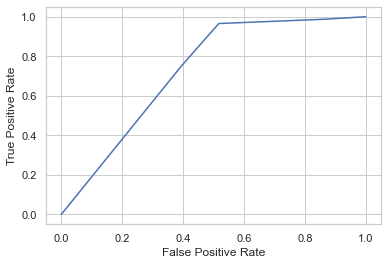

In [120]:
from sklearn import metrics
y_pred_proba =best_estim1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [184]:
best_model2=pickle.dumps(best_estim1) #saving the best model

# Model5

# Support Vector With Sigmoid

In [121]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
model5_prediction=clf.fit(x_train, y_train)
cross_scores=clf.score(x_train, y_train)
cross_risk=clf.score(x_test, y_test)

In [122]:
y_pred5=pd.DataFrame(clf.predict(x_train), columns=['yhat'])
print('Train Prediction\n')
y_pred5

Train Prediction



yhat
0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
..    ...
225   1.0
226   1.0
227   1.0
228   1.0
229   1.0

[230 rows x 1 columns]

In [123]:
ytst_pred5=pd.DataFrame(clf.predict(x_test), columns=['yhat'])
print('Test Prediction\n')
ytst_pred5

Test Prediction



yhat
0     1.0
1     1.0
2     1.0
3     1.0
4     0.0
..    ...
342   1.0
343   0.0
344   0.0
345   1.0
346   1.0

[347 rows x 1 columns]

In [124]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(clf.score(x_train, y_train),2))
print('Test Score: ', np.round(clf.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred5),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred5),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))

Train Score:  0.73
Test Score:  0.67
Train Accuracy Score:  0.73
Test Accuracy Score:  0.67
Cross Validation Score:  0.69
Cross Validation Risk:  0.0


In [125]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred5))

              precision    recall  f1-score   support

         0.0       0.49      0.46      0.48       114
         1.0       0.74      0.76      0.75       233

    accuracy                           0.67       347
   macro avg       0.62      0.61      0.62       347
weighted avg       0.66      0.67      0.66       347



In [126]:
print(confusion_matrix(y_test, ytst_pred5))

[[ 53  61]
 [ 55 178]]


In [127]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred5), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.61


In [128]:
from sklearn import metrics
try:
    y_pred_proba =clf.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
except AttributeError:
    print('Graph cannot be generated because probability is off for model development.')

Graph cannot be generated because probability is off for model development.


# Resampling, Rescaling And Re Feature Selection And Re Spliting For Model Optimization

# Reasoning Of Applying Resampling and developing models 6 to 10.

# The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
Two families of ensemble methods are usually distinguished:

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, etcetera

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting,etcetera

# Since, original y vector is highly unsampled, I will do resampling to balance both 1 and 0 data points to ensure that alongwith being low on variance, the model is also low on bias. Hence, I I can achieve, bias variance trade off.

# Hence, I have developed models 6 to 10 based on rfc, ensemble and svm methods on resampled data

In [129]:
y.value_counts() #original y vector, value counts

1.0    400
0.0    177
Name: Loan_Status_encoded, dtype: int64

1.0    367
0.0    367
Name: Loan_Status_encoded, dtype: int64


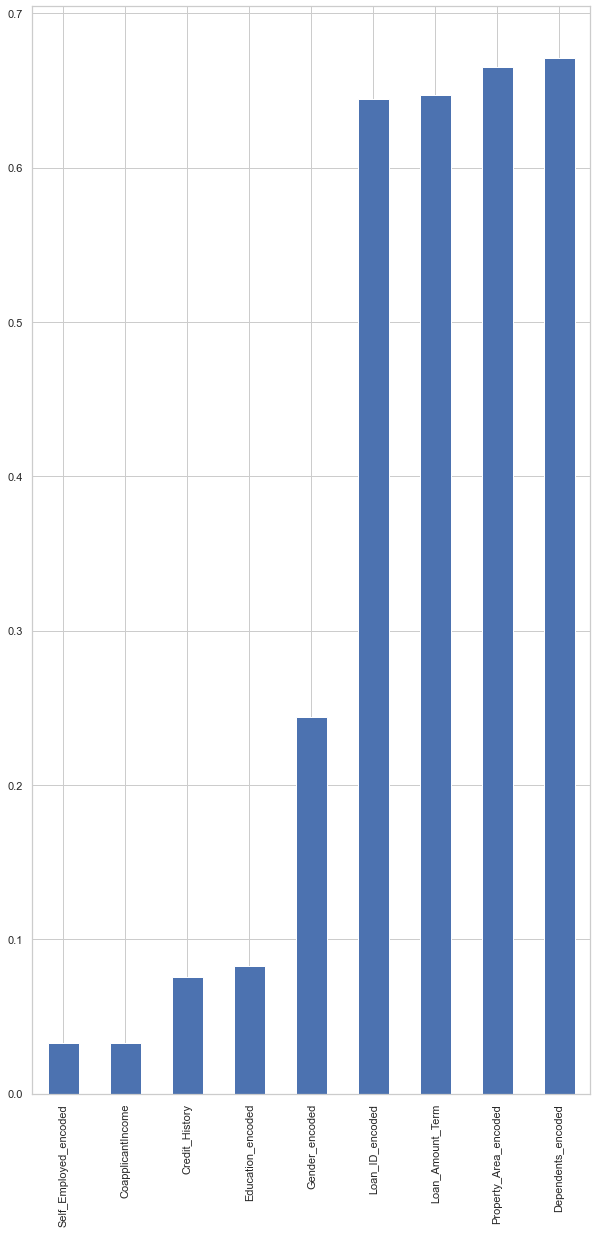

In [139]:
import numpy as np
from sklearn.utils import resample
x=x_frame11.copy()
y=final_dataframe['Loan_Status_encoded']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
X=pd.concat([x_train, y_train], axis=1)
not_good=X[X['Loan_Status_encoded']==0]
good=X[X['Loan_Status_encoded']==1]
not_good_upsampled=resample(not_good, replace=True, n_samples=len(good), random_state=0)
upsampled=pd.concat([good, not_good_upsampled])
x=upsampled.drop('Loan_Status_encoded', axis=1)
y=upsampled['Loan_Status_encoded']
x[np.isinf(x)] = 0
x[np.isnan(x)]=0
scale=MinMaxScaler([0,1])
scaled_data = scale.fit_transform(x)
scaled_frame=pd.DataFrame(scaled_data, columns=x.columns)
x=scaled_frame
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x,y,test_size=0.1)
print(upsampled['Loan_Status_encoded'].value_counts())
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))
p_values=p_values[p_values<0.05]
p_values=pd.DataFrame(p_values, columns=['P Values'])
p_values['Features']=p_values.index
p_values=p_values[['Features', 'P Values']]
if len(p_values.index) > 1:
    x=x[p_values['Features']]
else:
    x=x.drop('Loan_Status_encoded', axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

# The above matrix represent balanced label vector with 1105 data points for 0 and 1105 data points for 1. And the graph shoows new set of strong indicators based on p values, with variance threshold as low as 0.01 and comfidence as 95%.

In [140]:
p_values

Features  P Values
Self_Employed_encoded  Self_Employed_encoded  0.032566
CoapplicantIncome          CoapplicantIncome  0.032712

In [141]:
x_train.sample()

Self_Employed_encoded  CoapplicantIncome
596                    1.0           0.792237

In [142]:
y_train.sample()

32    0.0
Name: Loan_Status_encoded, dtype: float64

# Model 6

# RFC On Resampled Data With Intuitional Hyper Parameter Tuning

In [143]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import pickle
rfc=el(200, criterion='entropy', random_state=100, max_features='sqrt', min_weight_fraction_leaf=0.1, min_impurity_decrease=0.01, n_jobs=-1, warm_start=True, max_depth=30, max_leaf_nodes=10, ccp_alpha=1, oob_score=True, bootstrap=True)
rfc.fit(x_train, y_train)
model1_train_score=rfc.score(x_train, y_train)
model1_test_score=rfc.score(x_test, y_test)
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
cv_risk=scores.std()
y_pred=rfc.predict(x_train)
ytst_pred=rfc.predict(x_test)
model1_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred})
model1_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred})

In [144]:
model1_prediction_train

y_train  yhat
511      1.0   0.0
319      0.0   0.0
83       0.0   0.0
445      1.0   0.0
41       1.0   0.0
..       ...   ...
18       0.0   0.0
251      0.0   0.0
7        0.0   0.0
271      1.0   0.0
20       0.0   0.0

[660 rows x 2 columns]

In [145]:
model1_prediction_test

y_test  yhat
505     1.0   0.0
180     0.0   0.0
225     0.0   0.0
518     0.0   0.0
29      1.0   0.0
..      ...   ...
459     0.0   0.0
353     0.0   0.0
195     0.0   0.0
351     0.0   0.0
492     1.0   0.0

[74 rows x 2 columns]

In [146]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))

Train Score:  0.5
Test Score:  0.49
Train Accuracy Score:  0.5
Test Accuracy Score:  0.49
Cross Validation Score:  0.5
Cross Validation Risk:  0.0


In [147]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred))
print(confusion_matrix(y_test, ytst_pred))

              precision    recall  f1-score   support

         0.0       0.49      1.00      0.65        36
         1.0       0.00      0.00      0.00        38

    accuracy                           0.49        74
   macro avg       0.24      0.50      0.33        74
weighted avg       0.24      0.49      0.32        74

[[36  0]
 [38  0]]


In [148]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.5


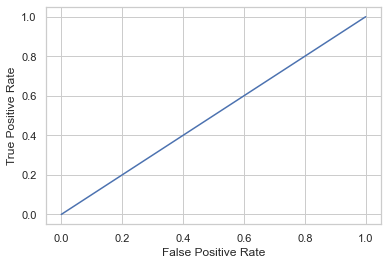

In [149]:
from sklearn import metrics
try:
    y_pred_proba =rfc.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
except IndexError as err:
    print(err)

# Model 7

# RFC On Resampled Data With Default Hyper Parameter Tuning

In [150]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
rfc1=el()
rfc1.fit(x_train, y_train)
model2_train_score=rfc1.score(x_train, y_train)
model2_test_score=rfc1.score(x_test, y_test)
scores1=cross_val_score(rfc1, x, y, cv=5)
cv_scores1=scores1.mean()
cv_risk1=scores1.std()
y_pred1=rfc1.predict(x_train)
ytst_pred1=rfc1.predict(x_test)
model2_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred1})
model2_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred1})

In [151]:
y_pred1

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1.

In [152]:
ytst_pred1

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1.])

In [153]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc1.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred1),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred1),2))
print('Cross Validation Score: ', np.round(cv_scores1,2))
print('Cross Validation Risk: ', np.round(cv_risk1,2))

Train Score:  0.77
Test Score:  0.62
Train Accuracy Score:  0.77
Test Accuracy Score:  0.62
Cross Validation Score:  0.68
Cross Validation Risk:  0.03


In [154]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred1), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.62


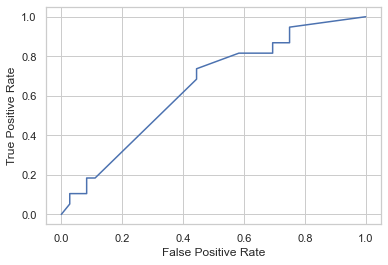

In [155]:
from sklearn import metrics
try:
    y_pred_proba =rfc1.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
except IndexError as err:
    print(err)

# Model8

# RFC With Grid Search CV On Resampled Data

In [156]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'max_features':['auto', 'sqrt', 'log2'],
 'criterion' : ['entropy', 'gini'],
 'bootstrap': [True, False],
 'oob_score':[True, False],
 'n_jobs':[None,-1],
 'warm_start':[True, False]
}
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
ytst_pred2=best_estim.predict(x_test)
model3_save=pickle.dumps(best_estim)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2}) # Model 8 train prediction
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2}) # Model 8 test prediction

In [157]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred2),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred2),2))

Train Score:  0.77
Test Score:  0.62
Train Accuracy Score:  0.77
Test Accuracy Score:  0.62


In [158]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'warm_start': True}
0.6787878787878788


In [159]:
best_estim=gridsearch.best_estimator_
print(best_estim)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=50, warm_start=True)


In [160]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred2))

print(confusion_matrix(y_test, ytst_pred2))

              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59        36
         1.0       0.62      0.68      0.65        38

    accuracy                           0.62        74
   macro avg       0.62      0.62      0.62        74
weighted avg       0.62      0.62      0.62        74

[[20 16]
 [12 26]]


In [161]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred2), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.62


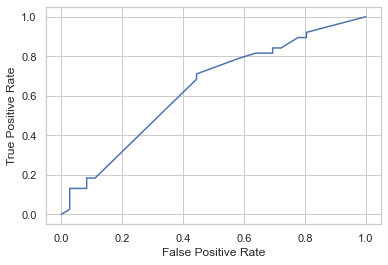

In [162]:
from sklearn import metrics
try:
    y_pred_proba =best_estim.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
except IndexError as err:
    print(err)

In [163]:
best_model1=pickle.dumps(best_estim) #saving the model

# Model 9

# Bagging Classifier With Grid Searh CV Hyper Parameter Tuning On Resampled Data

In [164]:
import sklearn
abreg1 = sklearn.ensemble.BaggingClassifier()
params = {
 'n_estimators': [50, 100],
 'bootstrap': [True, False],
 'random_state': [0,10,100,1000,10000,100000,100000],
 'oob_score': [True, False]
 }
gridsearch1=GridSearchCV(abreg1, params, cv=5, return_train_score=True)
gridsearch1.fit(x_train, y_train)
best_parameters1=gridsearch1.best_params_
best_score1=gridsearch1.best_score_
best_estim1=gridsearch1.best_estimator_
best_estim1.fit(x_train,y_train)
y_pred3=best_estim1.predict(x_train)
model4_train_score=best_estim1.score(x_train, y_train)
model4_test_score=best_estim1.score(x_test, y_test)
ytst_pred3=best_estim1.predict(x_test)
model4_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred3})
model4_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred3})

In [165]:
model4_prediction_train

y_train  yhat
511      1.0   1.0
319      0.0   1.0
83       0.0   0.0
445      1.0   1.0
41       1.0   1.0
..       ...   ...
18       0.0   1.0
251      0.0   0.0
7        0.0   0.0
271      1.0   1.0
20       0.0   0.0

[660 rows x 2 columns]

In [166]:
model4_prediction_test

y_test  yhat
505     1.0   0.0
180     0.0   1.0
225     0.0   0.0
518     0.0   1.0
29      1.0   1.0
..      ...   ...
459     0.0   0.0
353     0.0   0.0
195     0.0   0.0
351     0.0   0.0
492     1.0   1.0

[74 rows x 2 columns]

In [167]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim1.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred3),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred3),2))

Train Score:  0.77
Test Score:  0.62
Train Accuracy Score:  0.77
Test Accuracy Score:  0.62


In [168]:
print(gridsearch1.best_params_)
print(gridsearch1.best_score_)

{'bootstrap': True, 'n_estimators': 50, 'oob_score': True, 'random_state': 1000}
0.6787878787878787


In [169]:
best_estim=gridsearch1.best_estimator_
print(best_estim)

BaggingClassifier(n_estimators=50, oob_score=True, random_state=1000)


In [170]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred3), 2)
    print('auc: ',auc)
except ValueError as err:
    print(err)

auc:  0.62


In [171]:
y_train.unique()

array([1., 0.])

In [172]:
y_test.unique()

array([1., 0.])

In [173]:
y.unique()

array([1., 0.])

In [174]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred3))
print(confusion_matrix(y_test, ytst_pred3))

              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59        36
         1.0       0.62      0.68      0.65        38

    accuracy                           0.62        74
   macro avg       0.62      0.62      0.62        74
weighted avg       0.62      0.62      0.62        74

[[20 16]
 [12 26]]


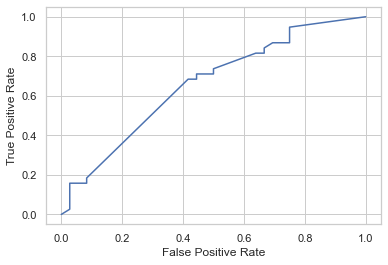

In [175]:
from sklearn import metrics
y_pred_proba =best_estim1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model 10

# Support Vector Classifier with sigmoid to prevent overfitting on resampled data

In [176]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
model5_prediction=clf.fit(x_train, y_train)
cross_scores=clf.score(x_train, y_train)
cross_risk=clf.score(x_test, y_test)

In [177]:
y_pred5=clf.predict(x_train)
y_pred5

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1.

In [178]:
ytst_pred5=clf.predict(x_test)
ytst_pred5

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1.])

In [179]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(clf.score(x_train, y_train),2))
print('Test Score: ', np.round(clf.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train,y_pred5),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test,ytst_pred5),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))

Train Score:  0.55
Test Score:  0.57
Train Accuracy Score:  0.55
Test Accuracy Score:  0.57
Cross Validation Score:  0.5
Cross Validation Risk:  0.0


In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,ytst_pred5))
print(confusion_matrix(y_test,ytst_pred5))

              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60        36
         1.0       0.60      0.47      0.53        38

    accuracy                           0.57        74
   macro avg       0.57      0.57      0.56        74
weighted avg       0.57      0.57      0.56        74

[[24 12]
 [20 18]]


In [181]:
from sklearn import metrics
try:
    y_pred_proba =clf.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
except AttributeError:
    print('Graph cannot be generated because probability is turned off for model development.')

Graph cannot be generated because probability is turned off for model development.


# Best models are saved in pickle for production

# Conclusion
# There are 3 best models based on auc are mentioned below. All the 3 models have auc=0.72

# Model 2: RFC With Default Hyper Parameter Tuning

Train Score:  0.84

Test Score:  0.81

Train Accuracy Score:  0.84

Test Accuracy Score:  0.81

Cross Validation Score:  0.82

Cross Validation Risk:  0.03

              precision    recall  f1-score   support

         0.0       0.87      0.48      0.62       114

         1.0       0.79      0.97      0.87       233

    accuracy                           0.81       347

    macro avg       0.83      0.72      0.75       347

weighted avg        0.82      0.81      0.79       347


[[ 55  59]

[  8 225]]

auc:  0.72

# Model 3: RFC With Grid Search CV
Train Score:  0.84

Test Score:  0.81

Train Accuracy Score:  0.84

Test Accuracy Score:  0.81

              precision    recall  f1-score   support

         0.0       0.87      0.48      0.62       114

         1.0       0.79      0.97      0.87       233

    accuracy                           0.81       347

    macro avg       0.83      0.72      0.75       347

weighted avg         0.82      0.81      0.79       347

[[ 55  59]

[  8 225]]

auc:  0.72

# Model4: Bagging Classifier With Grid Search CV
Train Score:  0.84

Test Score:  0.81

Train Accuracy Score:  0.84

Test Accuracy Score:  0.81

              precision    recall  f1-score   support

         0.0       0.87      0.48      0.62       114
    
         1.0       0.79      0.97      0.87       233

    
    accuracy                           0.81       347

    macro avg       0.83      0.72      0.75       347

weighted avg       0.82      0.81      0.79       347

[[ 55  59]

[  8 225]]

auc:  0.72

Please note, metrics calculation is explained above while development and evaluation.

# Credits:
DataTrained and Python Documentations.